## Import libraries

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

## Read in the adjacency matrix

The adjacency matrix is a 509 by 509 sparse matrix (mostly 0s). 

509 is the total number of unique structures, including one called "everything," which is the parent of all other structures. 

The ijth entry of this matrix is 1 if the structure in row i is the immediate parent of the structure in column j. 

The ijth entry of this matrix is 0 if the structure in row i is not the immediate parent of the structure in column j.

We want to reverse the order of columns and rows so that level 5 structures appear first and level 1 structures appear last.

We want to take the transpose of the resulting reordered matrix so that the ijth entry indicates if the structure in row i is the immediate child of the structure in column j.

In [2]:
adjacency_matrix = pd.read_csv("adjacency_matrix.csv", header = 0, index_col = 0)
# header = 0 means use the 0th row as column names
# index_col = 0 means use the 0th column as row names

In [3]:
# Reverse the order of columns 
columns = adjacency_matrix.columns.tolist()
columns = columns[::-1]
adjacency_matrix = adjacency_matrix[columns]

# Reverse the order of rows
adjacency_matrix = adjacency_matrix[::-1]

# Take the transpose of the matrix
adjacency_matrix = adjacency_matrix.T

In [4]:
adjacency_matrix

Everything  CSF_5  Myelencephalon_5  Metencephalon_5  \
Everything                 0      1                 1                1   
CSF_5                      0      0                 0                0   
Myelencephalon_5           0      0                 0                0   
Metencephalon_5            0      0                 0                0   
Mesencephalon_5            0      0                 0                0   
...                      ...    ...               ...              ...   
SFG_pole_L_1               0      0                 0                0   
SFG_PFC_R_1                0      0                 0                0   
SFG_PFC_L_1                0      0                 0                0   
SFG_R_1                    0      0                 0                0   
SFG_L_1                    0      0                 0                0   

                  Mesencephalon_5  Diencephalon_R_5  Diencephalon_L_5  \
Everything                      1                 1                 1   
CSF_5                           0                 0                 0   
Myelencephalon_5                0                 0                 0   
Metencephalon_5                 0                 0                 0   
Mesencephalon_5                 0                 0                 0   
...                           ...               ...               ...   
SFG_pole_L_1                    0                 0                 0   
SFG_PFC_R_1                     0                 0                 0   
SFG_PFC_L_1                     0                 0                 0   
SFG_R_1                         0                 0                 0   
SFG_L_1                         0                 0                 0   

                  Telencephalon_R_5  Telencephalon_L_5  Sulcus_R_4  ...  \
Everything                        1                  1           0  ...   
CSF_5                             0                  0           1  ...   
Myelencephalon_5                  0                  0           0  ...   
Metencephalon_5                   0                  0           0  ...   
Mesencephalon_5                   0                  0           0  ...   
...                             ...                ...         ...  ...   
SFG_pole_L_1                      0                  0           0  ...   
SFG_PFC_R_1                       0                  0           0  ...   
SFG_PFC_L_1                       0                  0           0  ...   
SFG_R_1                           0                  0           0  ...   
SFG_L_1                           0                  0           0  ...   

                  MFG_DPFC_R_1  MFG_DPFC_L_1  MFG_R_1  MFG_L_1  SFG_pole_R_1  \
Everything                   0             0        0        0             0   
CSF_5                        0             0        0        0             0   
Myelencephalon_5             0             0        0        0             0   
Metencephalon_5              0             0        0        0             0   
Mesencephalon_5              0             0        0        0             0   
...                        ...           ...      ...      ...           ...   
SFG_pole_L_1                 0             0        0        0             0   
SFG_PFC_R_1                  0             0        0        0             0   
SFG_PFC_L_1                  0             0        0        0             0   
SFG_R_1                      0             0        0        0             0   
SFG_L_1                      0             0        0        0             0   

                  SFG_pole_L_1  SFG_PFC_R_1  SFG_PFC_L_1  SFG_R_1  SFG_L_1  
Everything                   0            0            0        0        0  
CSF_5                        0            0            0        0        0  
Myelencephalon_5             0            0            0        0        0  
Metencephalon_5              0            0            0        0        0  
Mesen

## Visualize the adjacency matrix

<IPython.core.display.Javascript object>


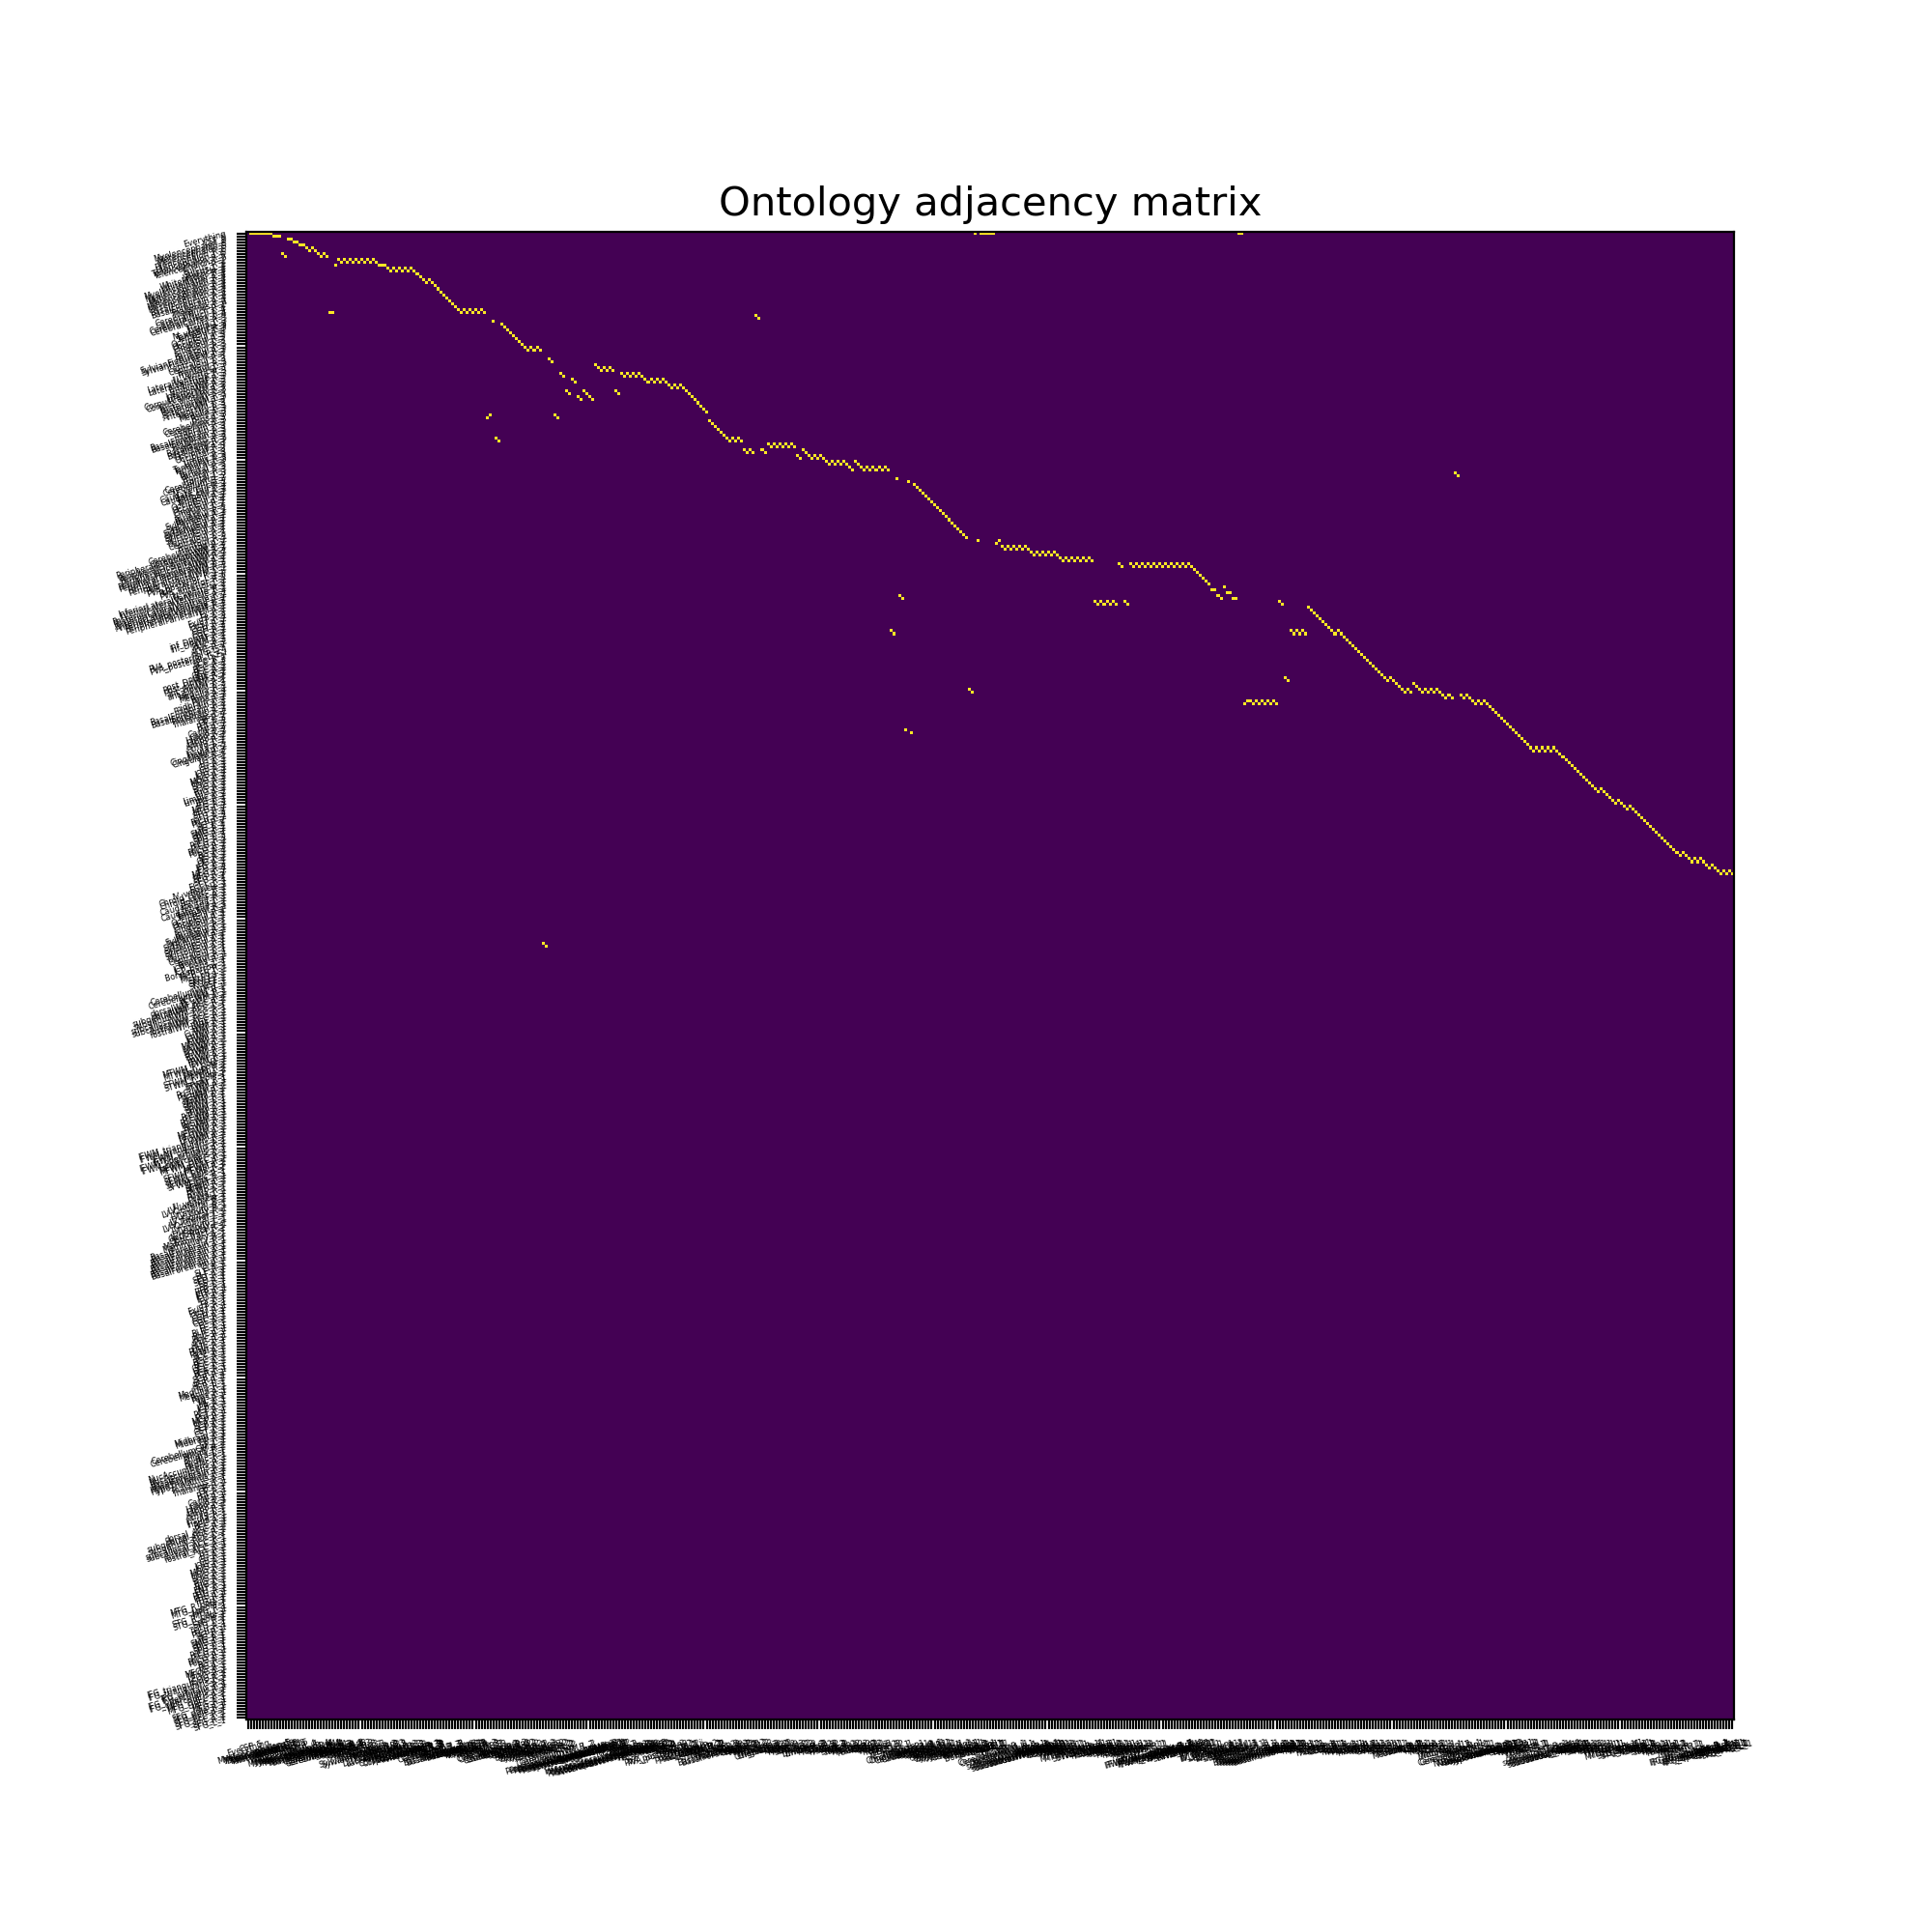

Text(0.5, 1.0, 'Ontology adjacency matrix')

In [5]:
fig, ax = plt.subplots(1, figsize = (10, 10)) # Create one 10x10 empty plot
ax.imshow(adjacency_matrix) # Plot the adjacency matrix 
ax.set_xticks(np.arange(adjacency_matrix.shape[0])) # Create 509 ticks on the x axis
ax.set_yticks(np.arange(adjacency_matrix.shape[0])) # Create 509 ticks on the y axis
names = adjacency_matrix.columns # List of the 509 structures' names
ax.set_xticklabels(names, rotation = 15, fontsize = 3) # Set each x axis tick label to be the name of each structure 
ax.set_yticklabels(names, rotation = 15, fontsize = 3) # Set each y axis tick label to be the name of each structure
ax.set_title("Ontology adjacency matrix", fontsize = 15) # Set the plot title

## Generate data

Generate 20 samples of Gaussian random variables at each leaf structure (289 Gaussian random variables per sample).

If a given structure is affected, its mean will be 1. If a given structure is not affected, its mean will be 0.

The data matrix is 20 samples by 289 leaf structures.

The first 10 patients are affected (have the disease). The last 10 patients are unaffected (don't have the disease). 

For unaffected samples, Z is 0 everywhere (0 mean at every leaf structure).

For affected samples, pick two sibling structures in the medial temporal lobe such that one sibling is affected but not both. So, we can conclude that their parent is affected. Set one or the other sibling in the pair to be affected.

The medial temporal lobe includes the hippocampus, amygdala, and parahippocampal regions. 

We chose the left hippocampus and the left amygdala to be the two sibling structures. Although the left hippocampus and the left amygdala have different parents, they have the same grandparent Limbic_L_3. 

Each affected patient has either the left hippocampus or the left amygdala affected but not both. Among the affected patients, we estimate there's a 0.5 probability that the left hippocampus is affected and a 0.5 probability that the left amygdala is affected.

In [6]:
np.where(names == "Amyg_L_1"), np.where(names == "Hippo_L_1")
names[436], names[434]

('Amyg_L_1', 'Hippo_L_1')

<IPython.core.display.Javascript object>


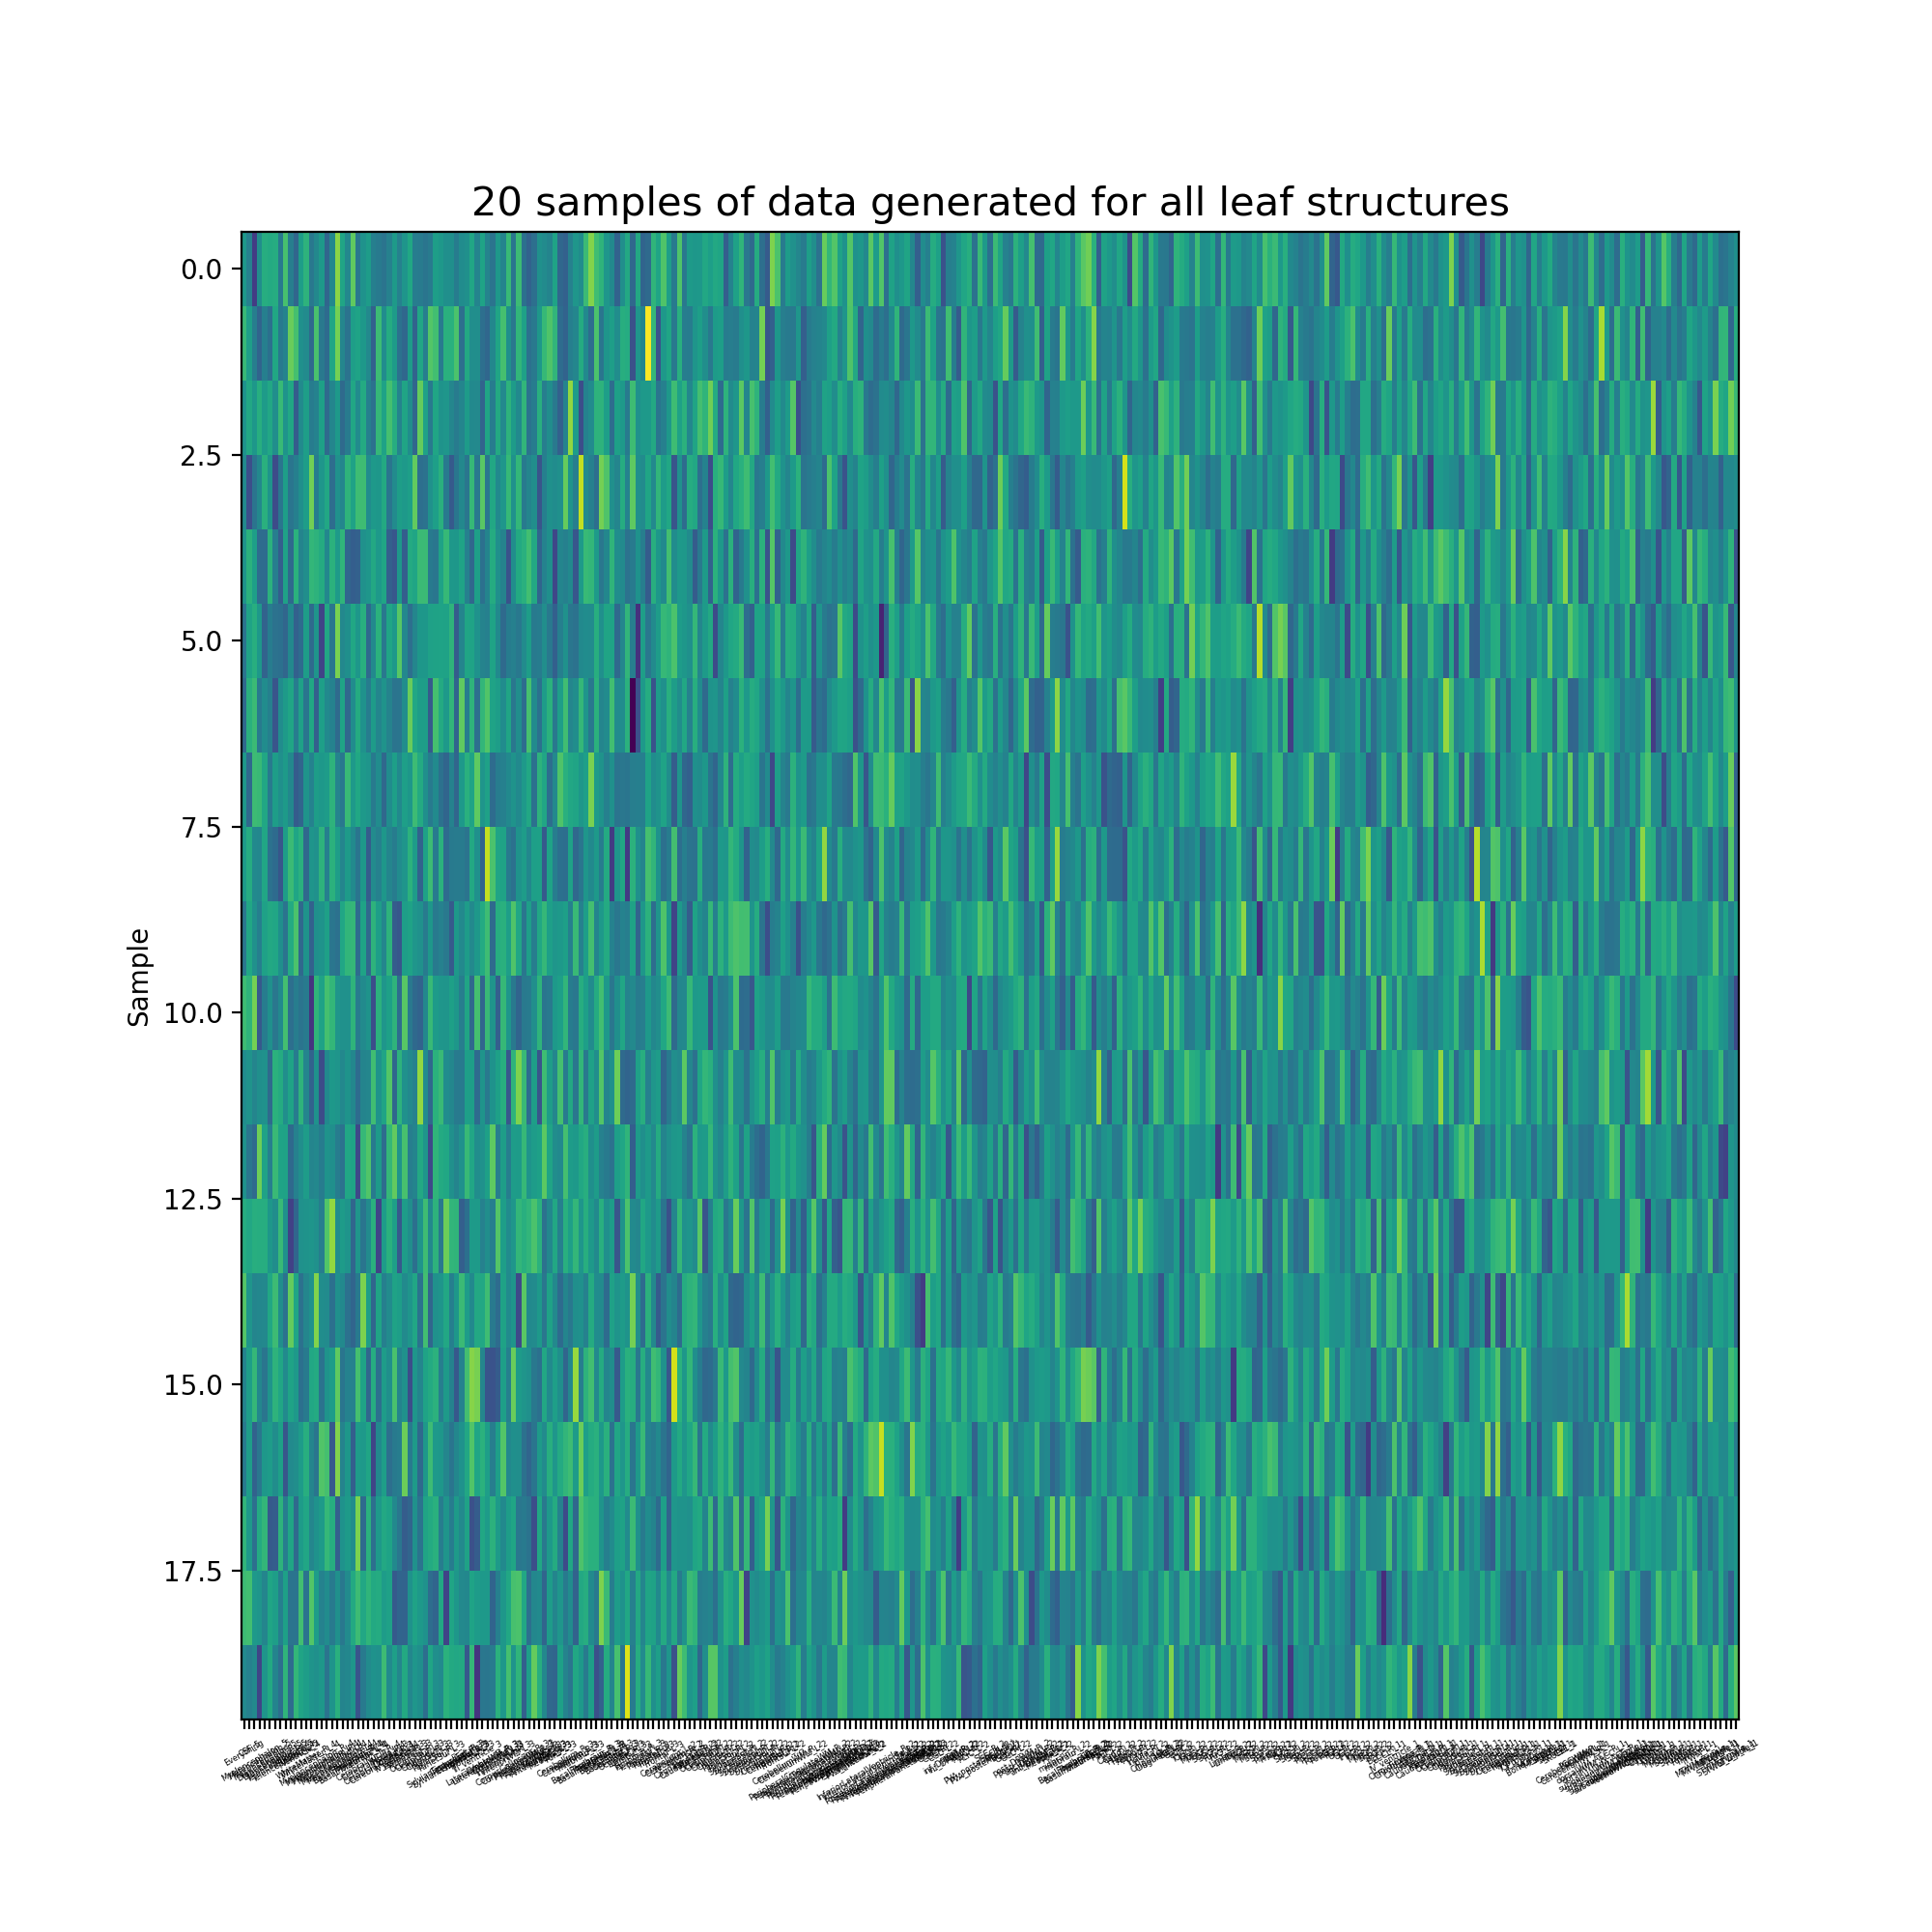

Text(0.5, 1.0, '20 samples of data generated for all leaf structures')

In [7]:
N = 20 # Number of samples
mu = 1.0 # Difference in mean, note that this is generally unknown
M = adjacency_matrix.shape[0] # Number of total unique structures

Z = np.zeros((N,M)) # Initialize Z, which will be a binary variable that tells us if a structure is affected
Naffected = N // 2 # Affected samples (roughly half), note that this is generally unknown
for i in range(N):
    if i < Naffected: # Assume that the first half of samples are affected and second half are not
        if np.random.rand() < 0.5:
            Z[i][436] = 1 # Left amygdala affected 
        else:
            Z[i][434] = 1 # Left hippocampus affected
            
is_leaf = np.concatenate([np.ones(289), np.zeros(509 - 289)]) # 1 for leaf structures, 0 for non-leaf structures
is_leaf = np.array(is_leaf, dtype = bool) # Convert is_leaf to the boolean type
m = np.sum(is_leaf) # Number of leaf structures
            
G = np.arange(N) < Naffected # First 10 samples are affected; last 10 samples are unaffected 
X = Z[:,is_leaf > 0] * mu + np.random.randn(N,m)

# Visualize the data that was generated
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(X)
ax.set_aspect("auto")
ax.set_ylabel("Sample")
ax.set_xticks(np.arange(m))
ax.set_xticklabels(list(names[is_leaf > 0]), rotation = 30, fontsize = 3)
ax.set_title("20 samples of data generated for all leaf structures", fontsize = 15)

## Create an adjacency matrix of ancestors and an adjacency matrix of descendants

<IPython.core.display.Javascript object>


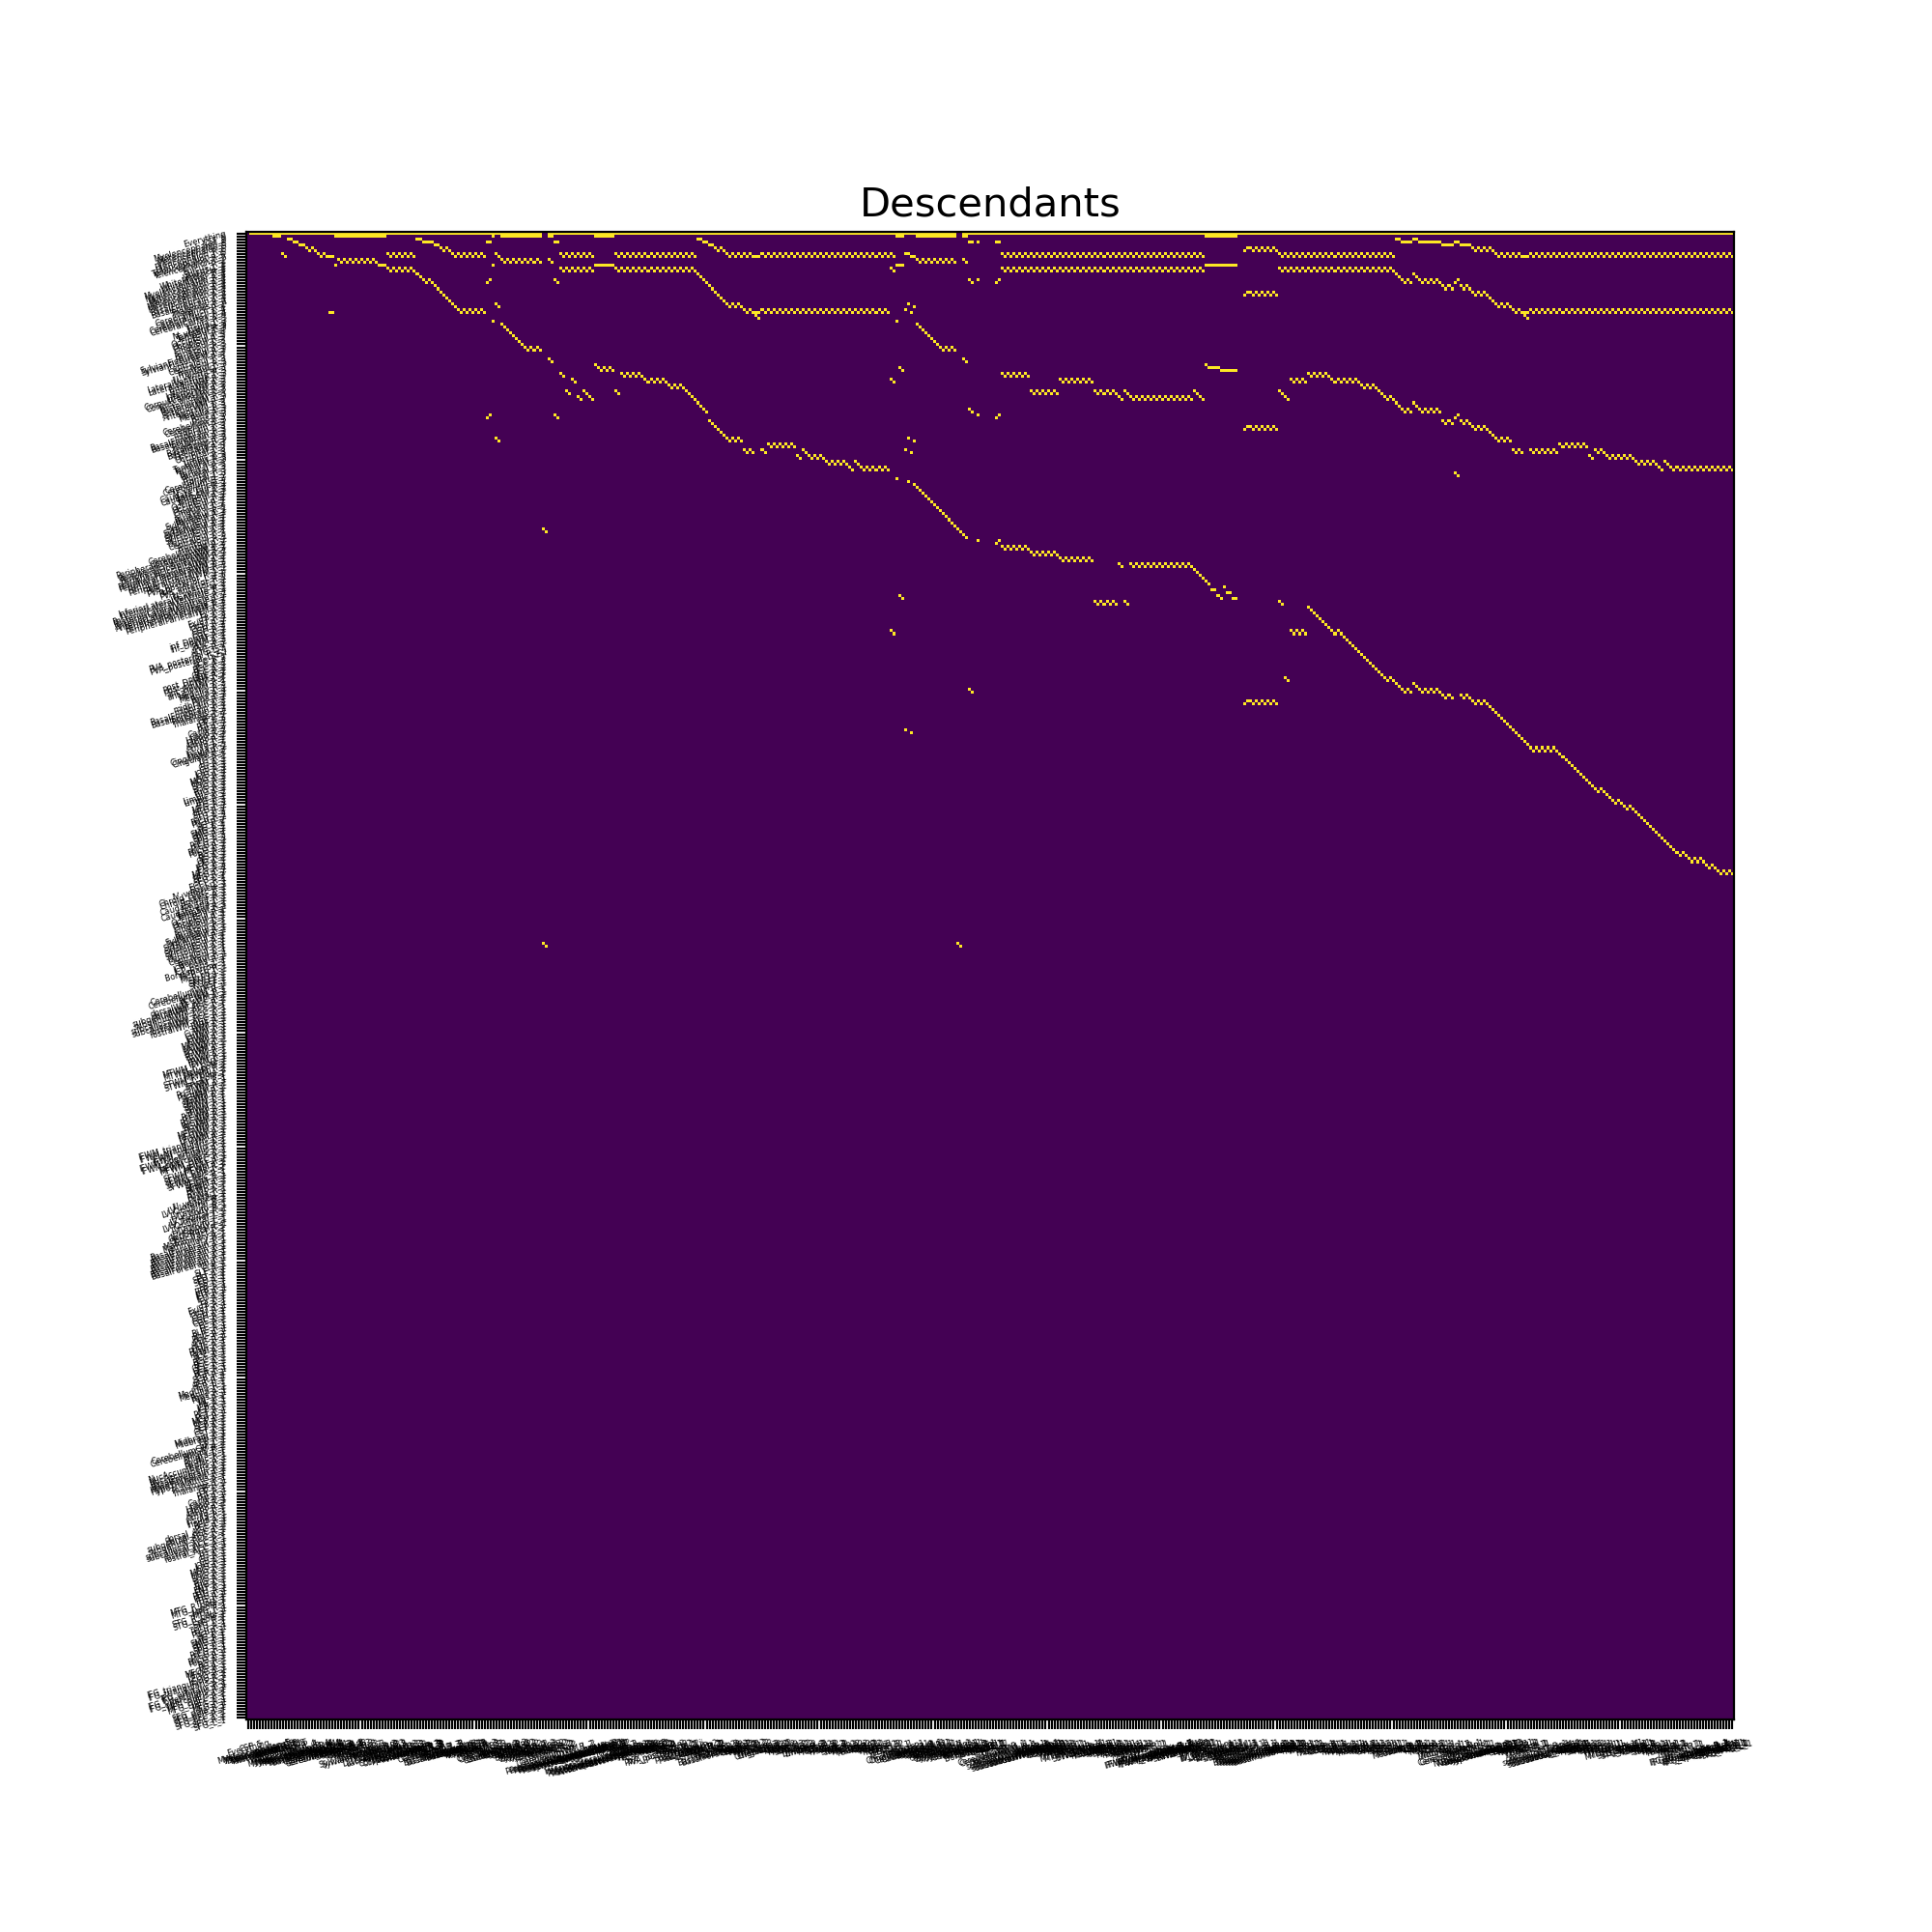

Text(0.5, 1.0, 'Descendants')

In [8]:
# Adjacency matrix that shows all descendants
A = np.array(adjacency_matrix, dtype = bool)
Descendants = np.copy(A)

# Adding additional generations to the descendants 
# Repeat 6 times since we have 5 generations (1, 2, 3, 4, 5)
Descendants = np.logical_or(Descendants,Descendants@A)
Descendants = np.logical_or(Descendants,Descendants@A)
Descendants = np.logical_or(Descendants,Descendants@A)
Descendants = np.logical_or(Descendants,Descendants@A)
Descendants = np.logical_or(Descendants,Descendants@A)
Descendants = np.logical_or(Descendants,Descendants@A)
Descendants_and_self = np.logical_or(Descendants, np.eye(M))

# Plot the adjacency matrix for all descendants
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(Descendants)
ax.set_xticks(np.arange(M))
ax.set_yticks(np.arange(M))
ax.set_xticklabels(names, rotation = 15, fontsize = 3)
ax.set_yticklabels(names, rotation = 15, fontsize = 3)
ax.set_title('Descendants', fontsize = 15)

<IPython.core.display.Javascript object>


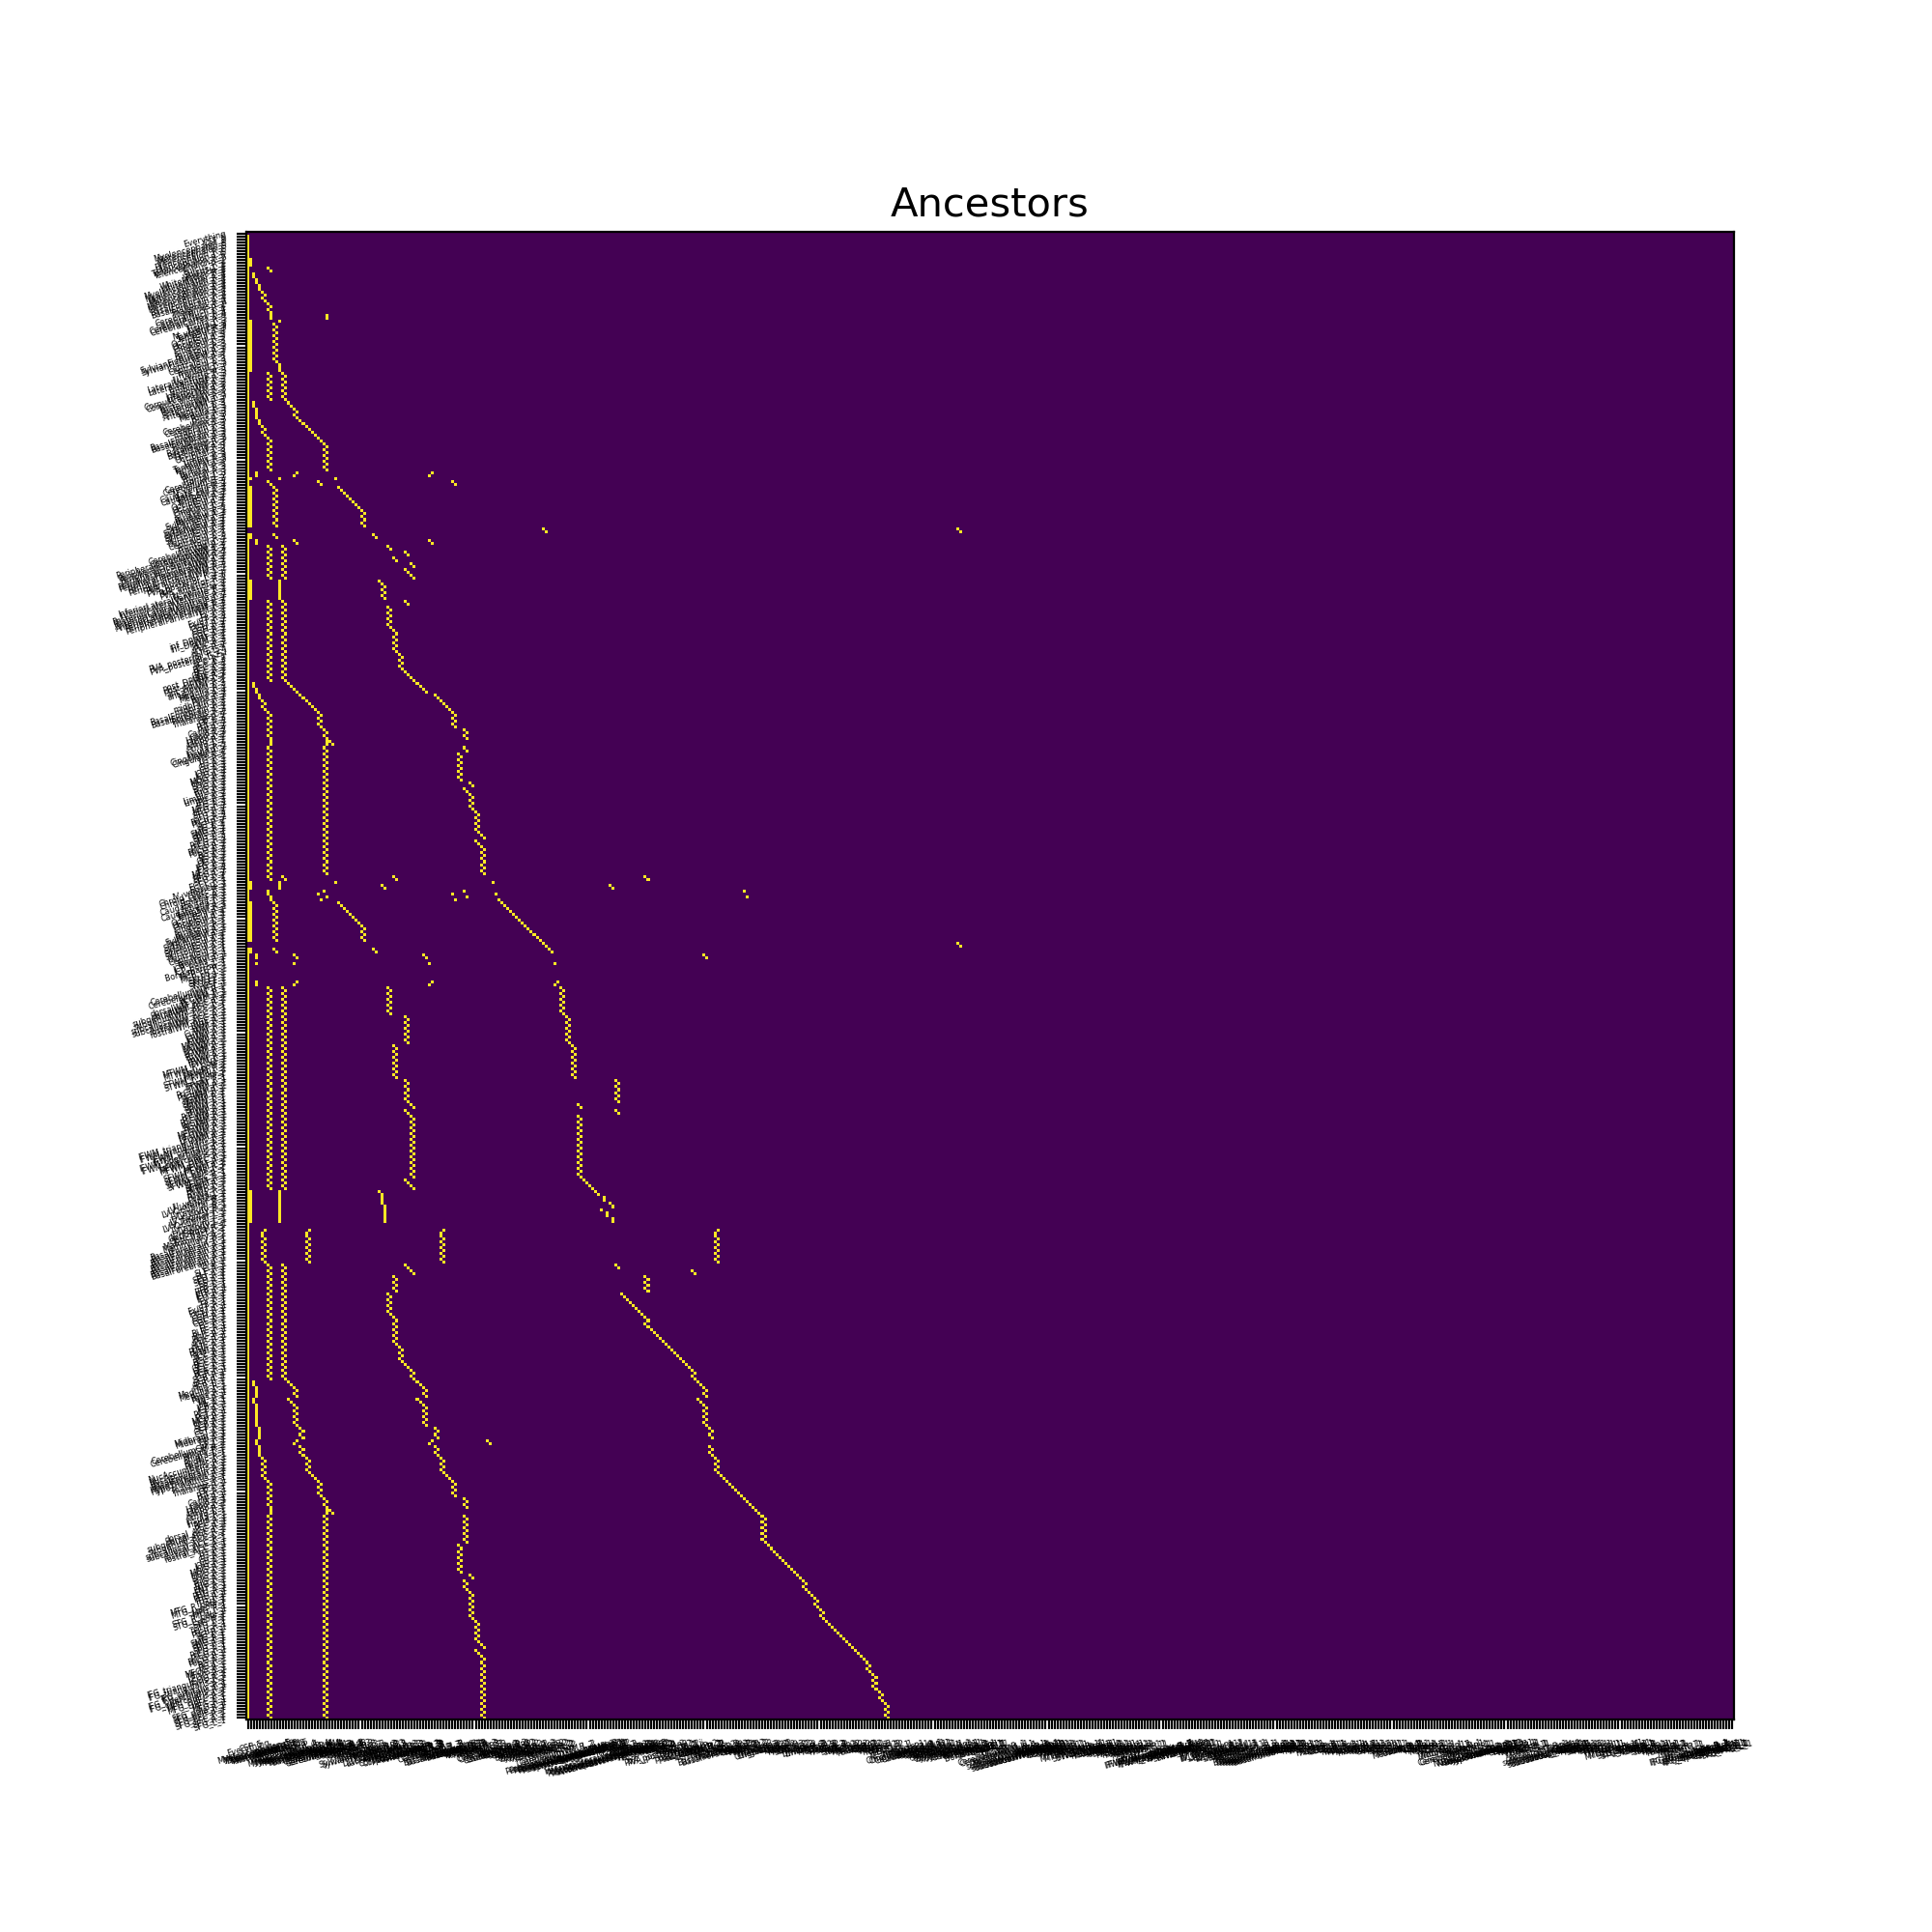

Text(0.5, 1.0, 'Ancestors')

In [9]:
# Adjacency matrix that shows all ancestors
Ancestors = Descendants.T # Take transpose of descendants matrix to get ancestors    
Ancestors_and_self = np.logical_or(Ancestors,np.eye(M))
fig,ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(Ancestors)
ax.set_xticks(np.arange(M))
ax.set_yticks(np.arange(M))
ax.set_xticklabels(names, rotation = 15, fontsize = 3)
ax.set_yticklabels(names, rotation = 15, fontsize = 3)
ax.set_title('Ancestors', fontsize = 15)

## Defining functions for calculating P and Q

N is the number of samples

M is the number in the ontology (number in the total unique structures)

m is the number of leaves

X is the data with size Nxm

P is the probabilities of Z in the model with size M

Z is the probability that a structure is affected

Q is the conditional probability of Z given its parent in the model. Q is size M, and it can be computed from P exactly.

R is the conditional probability of Z given data in leaves. R is size NxM. Actually it is NxMaffected
note I'm saying the first axis is N (the samples).

In [10]:
# Define the function for phi (CDF of the standard normal distribution)
def phi(x,mu=0.0):
    '''Gaussian'''
    return 1.0/np.sqrt(2.0*np.pi)*np.exp(-(x - mu)**2/2.0)

In [11]:
# Define the function for calculating P (probabilities of Z) from Q (conditional probability of Z given parent)
def P_from_Q(Q,Ancestors_and_self):
    '''I don't need this function
    '''
    P = np.empty_like(Q)
    for i in range(M):
        P[i] = np.prod(Q[Ancestors_and_self[i,:]])
    return P

In [12]:
# Define the function for calculating Q (conditional probability of Z given parent) from P (probabilities of Z)
def Q_from_P(P,A):
    # now we need to calculate Q
    Q = np.zeros_like(P)
    Q[0] = P[0]
    for i in range(1,M):
        Q[i] = P[i] / P[A[:,i]]
    return Q

In [69]:
# Define the function for estimating P
def estimate_P(X,mu,A,Descendants_and_self,draw=False,niter=100,P0=None,names=None):
    
    if draw: 
        f,ax = plt.subplots(2,2)
        if names is None:
            names = np.arange(A.shape[0])

    N = X.shape[0]
    m = X.shape[1]
    M = A.shape[0]
    
    # okay now comes my algorithm
    # initialize
    if P0 is None:
        P = np.ones(M)*0.5
    else:
        P = np.asarray(P0)
    
    for it in range(niter):
        # calculate leaf posterior (this is prob of no effect)
        #leaf_posterior = ((1.0-P[is_leaf])*phi(X))
        #leaf_posterior = leaf_posterior/(leaf_posterior + P[is_leaf]*phi(X,mu) )
        P_over_one_minus_P = P/(1.0-P)
        #leaf_log_posterior = -np.log(1.0 + P_over_one_minus_P[is_leaf]*phi(X,mu)/phi(X) )
        leaf_log_posterior = -np.log1p( P_over_one_minus_P[is_leaf]*phi(X,mu)/phi(X) )
        

        # calculate posterior for all structures
        # now for each structure, I need a leaf likelihod, and an adjustment
        #posterior = np.zeros((N,M))
        log_posterior = np.zeros((N,M))
        for i in range(M):
            #posterior[:,i] = np.prod(leaf_posterior[:,Descendants_and_self[i,:][is_leaf]],1)
            log_posterior[:,i] = np.sum(leaf_log_posterior[:,Descendants_and_self[i,:][is_leaf]],1)
        
        # calculate adjustment factor for correlations
        Q = Q_from_P(P,A)
        #adjustment_single = np.ones(M)
        log_adjustment_single = np.zeros(M)
        for i in range(M):
            if is_leaf[i]:
                continue
            #adjustment_single[i] = (1.0 - P[i])/ ((1.0 - P[i]) + P[i]*np.prod(1.0 - Q[A[i,:]]))
            #log_adjustment_single[i] = -np.log(1.0 + P_over_one_minus_P[i]*np.prod(1.0 - Q[A[i,:]]))
            log_adjustment_single[i] = -np.log1p(P_over_one_minus_P[i]*np.prod(1.0 - Q[A[i,:]]))
            
        
        # now my adjust ment requres products of all descendants
        #adjustment = np.ones(M)
        log_adjustment = np.ones(M)
        for i in range(M):
            #adjustment[i] = np.prod(adjustment_single[Descendants_and_self[i,:]])
            log_adjustment[i] = np.sum(log_adjustment_single[Descendants_and_self[i,:]])
            

        # calculate the adjusted posterior
        #posterior = posterior*adjustment
        log_posterior = log_posterior + log_adjustment
        
        #P = np.sum(1.0 - posterior,0)/N        
        #P = np.sum(1.0 - np.exp(log_posterior),0)/N
        P = -np.sum(np.expm1(log_posterior),0)/N
        posterior = np.exp(log_posterior)
        
        # draw        
        if draw>0 and ( (not it%draw) or (it==niter-1)):     
            
            ax[0,0].cla()
            ax[0,0].imshow(posterior)
            ax[0,0].set_aspect('auto')
            ax[0,0].set_title('P[Z=0|X] (prob not affected)')
            ax[0,0].set_xticks(np.arange(M))
            ax[0,0].set_xticklabels(names,rotation=15, fontsize = 5)
            ax[0,0].set_ylabel('Sample')

            ax[0,1].cla()
            ax[0,1].bar(np.arange(M),P)
            ax[0,1].set_xticks(np.arange(M))
            ax[0,1].set_xticklabels(names,rotation=15, fontsize = 5)


            f.canvas.draw()
    return P

## Checking that the adjacency matrix was constructed correctly

Inconsistency in raw data: There are two instances of PVA_posterior_L that are in level 2. One has the immediate parent InferiorWM_L_3, while the other one has the immediate parent PosteriorWM_L_3. Same case with two instances of PVA_posterior_R

Solution: Change the PVA_posterior_L_2 with immediate parent InferiorWM_L_3 to be PVA_posterior_L_2_i. Change the PVA_posterior_L_2 with immediate parent PosteriorWM_L_3 to be PVA_posterior_L_2_ii.

In [14]:
# Making sure that each leaf structure has 0 parents or 1 parent in the adjacency matrix
np.sum(A, 0) # Sum of each row of A

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Using P and Q to estimate the probability that each structure is affected

In the adjacency matrix, parents are listed before children. So, as we move from left to right across the x axis, we go from parents to children. 

We expect to see a 0.5 probability of being affected for the left amygdala and left hippocampus at their levels 1 and 2. 

We expect their grandparent (left limbic at level 3) to have a 1.0 probability of being affected. 

We expect the grandparents of left limbic at level 3 (left cerebral cortex at level 4, left telencephalon at level 5, and "everything") to each have a 1.0 probability of being affected. 

We expect all other structures not mentioned above to have a 0 probability of being affected.

<IPython.core.display.Javascript object>


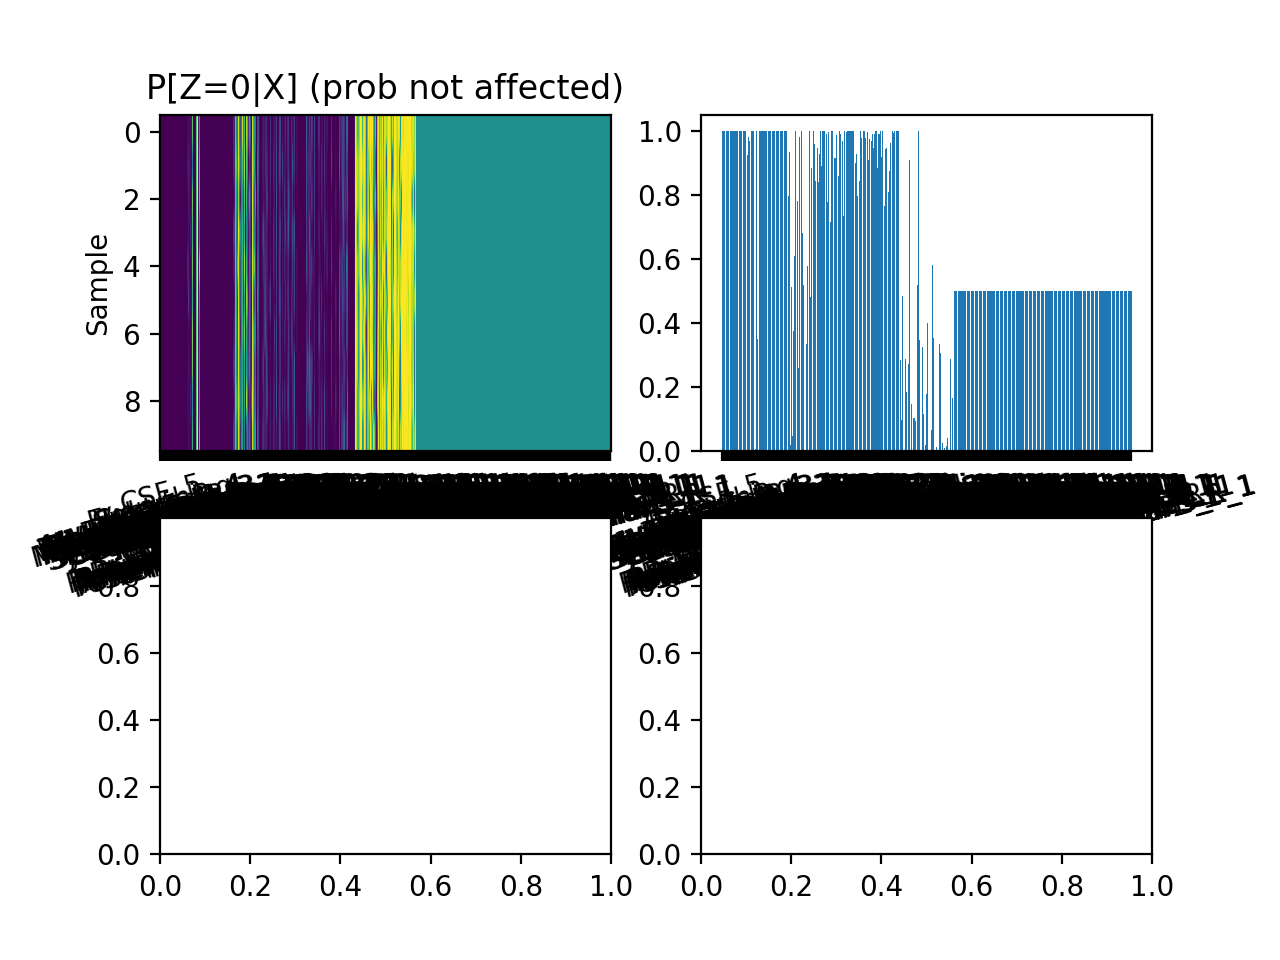

<ipython-input-13-711bd938f80e>:24: RuntimeWarning: divide by zero encountered in true_divide
  P_over_one_minus_P = P/(1.0-P)


In [15]:
P = np.ones(M) * 0.5 # Array of 509 copies of 0.5
Q = Q_from_P(P, A)

P0 = np.ones(M) * 0.5
niter = 20
P = estimate_P(X[G], mu, A, Descendants_and_self, draw=1, P0=P0, niter=niter, names=names)

The results show that many parent structures (left side of x axis) tend to have a 1.0 probability of being affected, a few children structures (right side of x axis) have a 0 probability of being affected, and most children structures have a 0.5 probability of being affected.

Since there are many structures in this adjacency matrix, it's difficult to say if these results are correct. There are so many structures that we can't read any structure names on the x axis to  see if the probabilities of being affected are correct.

Solution: create a smaller subset of the larger original adjacency matrix, and run the above code on it so that it's easier to interpet the results.

Not all of the code was able to run successfully (see above error!)

## Creating a smaller subset of the original adjacency matrix

Our goal is to create a smaller subset of the original adjacency matrix so that it's easier to interpret the results. 

The subset will include the affected structures and all of their parents. 

Specifically, the subset will include the left amygdala at levels 1 and 2, the left hippocampus at levels 1 and 2, the left limbic at level 3, the left cerebral cortex at level 4, and the left telencephalon at level 5. 

In [16]:
multilevel = pd.read_csv("multilevel.csv", header = 0, index_col = 0) # Read in data
multilevel = multilevel[::-1] # Reverse the order of rows
multilevel.Number = range(1, 510) # Reassign the numbers
multilevel

Number         Structure Immediate.parent  \
505       1        Everything              NaN   
504       2             CSF_5       Everything   
503       3  Myelencephalon_5       Everything   
502       4   Metencephalon_5       Everything   
501       5   Mesencephalon_5       Everything   
..      ...               ...              ...   
5       505      SFG_pole_L_1          SFG_L_2   
4       506       SFG_PFC_R_1          SFG_R_2   
3       507       SFG_PFC_L_1          SFG_L_2   
2       508           SFG_R_1          SFG_R_2   
1       509           SFG_L_1          SFG_L_2   

                              Immediate.child.children  
505  Telencephalon_L_5, Telencephalon_R_5, Dienceph...  
504                Ventricle_4, Sulcus_L_4, Sulcus_R_4  
503             Myelencephalon_L_4, Myelencephalon_R_4  
502               Metencephalon_L_4, Metencephalon_R_4  
501               Mesencephalon_L_4, Mesencephalon_R_4  
..                                                 ...  
5                                                  NaN  
4                                                  NaN  
3                                                  NaN  
2                                                  NaN  
1                                                  NaN  

[509 rows x 4 columns]

In [17]:
# Finding the structures to include in the subset (left amygdala, left hippocampus, and their ancestors)
multilevel[multilevel.Structure == "Amyg_L_1"], multilevel[multilevel.Structure == "Hippo_L_1"]
multilevel[multilevel.Structure == "Amyg_L_2"], multilevel[multilevel.Structure == "Hippo_L_2"]
multilevel[multilevel.Structure == "Limbic_L_3"]
multilevel[multilevel.Structure == "CerebralCortex_L_4"]
multilevel[multilevel.Structure == "Telencephalon_L_5"]
multilevel[multilevel.Structure == "Everything"];

In [18]:
# Index the rows and columns of the adjacency matrix by these structures to create a subset
subset = adjacency_matrix[["Amyg_L_1", "Hippo_L_1", "Amyg_L_2", "Hippo_L_2", "Limbic_L_3", "CerebralCortex_L_4", "Telencephalon_L_5", "Everything"]]
subset = subset.loc[["Amyg_L_1", "Hippo_L_1", "Amyg_L_2", "Hippo_L_2", "Limbic_L_3", "CerebralCortex_L_4", "Telencephalon_L_5", "Everything"]]

In [19]:
# Reverse the order of rows and columns in the subset of the adjacency matrix
cols = subset.columns.tolist()
cols = cols[::-1]
subset = subset[cols]
subset = subset[::-1]
subset

Everything  Telencephalon_L_5  CerebralCortex_L_4  \
Everything                   0                  1                   0   
Telencephalon_L_5            0                  0                   1   
CerebralCortex_L_4           0                  0                   0   
Limbic_L_3                   0                  0                   0   
Hippo_L_2                    0                  0                   0   
Amyg_L_2                     0                  0                   0   
Hippo_L_1                    0                  0                   0   
Amyg_L_1                     0                  0                   0   

                    Limbic_L_3  Hippo_L_2  Amyg_L_2  Hippo_L_1  Amyg_L_1  
Everything                   0          0         0          0         0  
Telencephalon_L_5            0          0         0          0         0  
CerebralCortex_L_4           1          0         0          0         0  
Limbic_L_3                   0          1         1          0         0  
Hippo_L_2                    0          0         0          1         0  
Amyg_L_2                     0          0         0          0         1  
Hippo_L_1                    0          0         0          0         0  
Amyg_L_1                     0          0         0          0         0

## Visualize the adjacency matrix subset

<IPython.core.display.Javascript object>


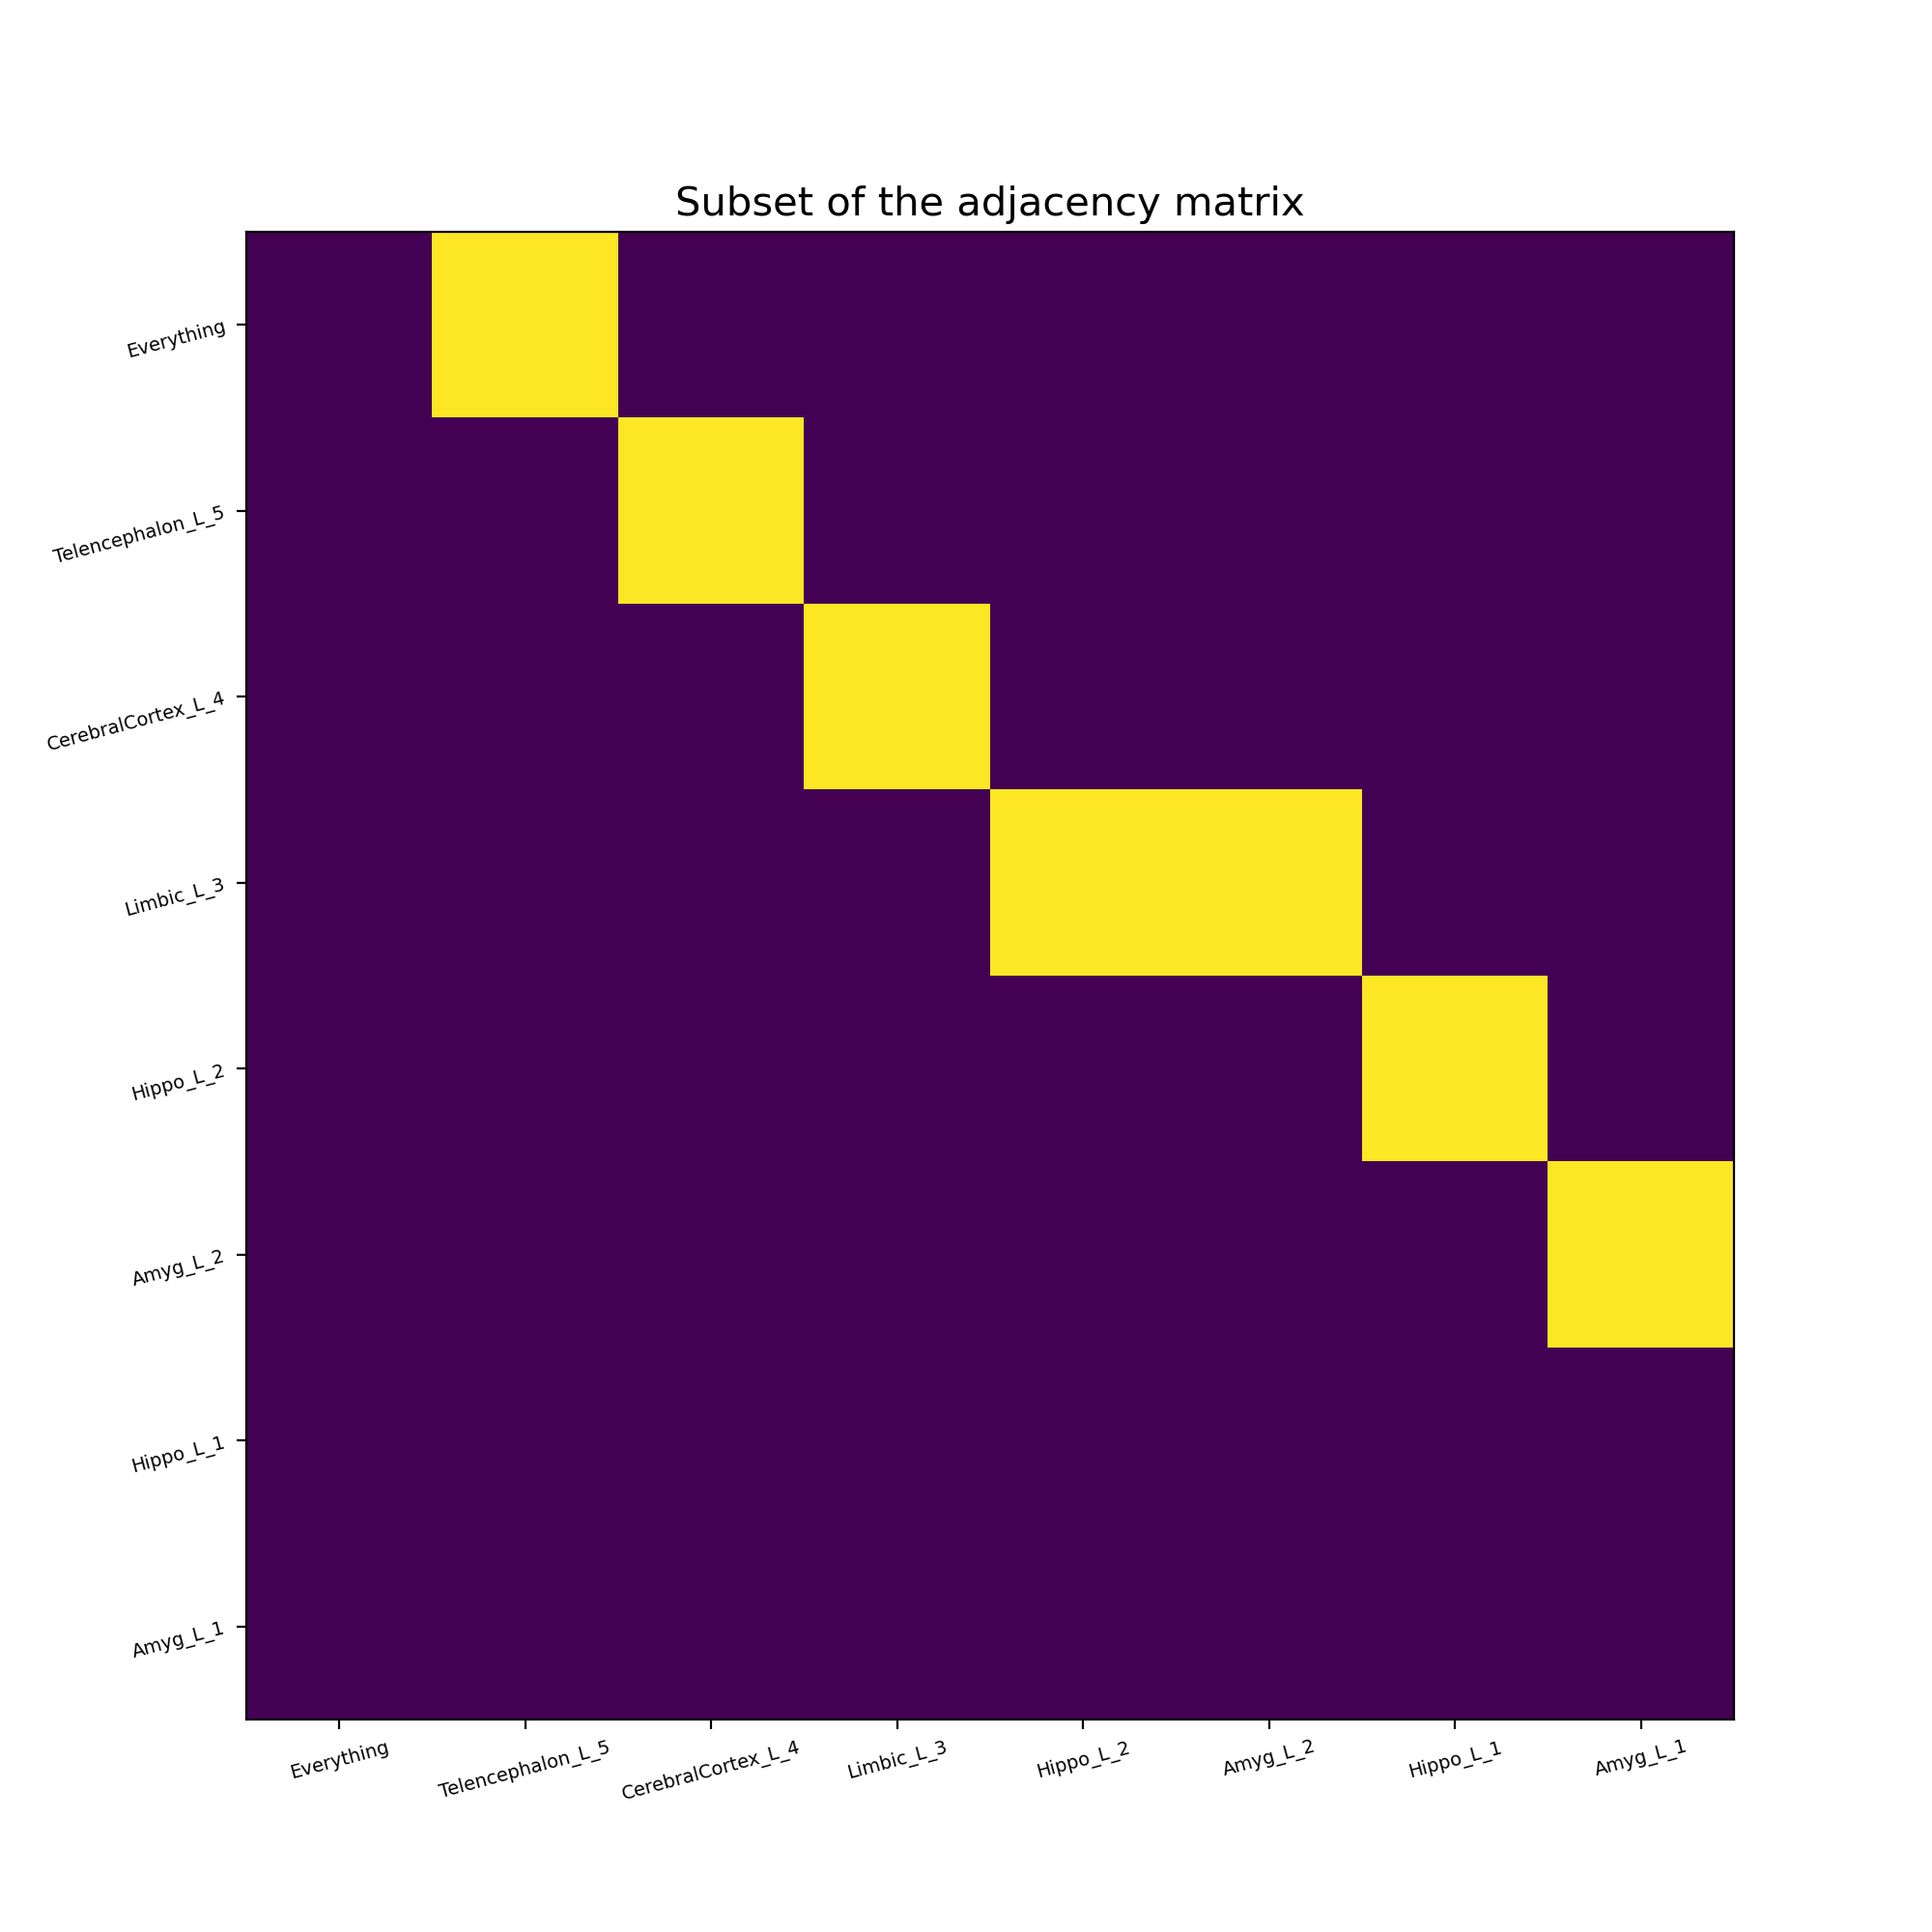

Text(0.5, 1.0, 'Subset of the adjacency matrix')

In [20]:
fig, ax = plt.subplots(1, figsize = (10, 10)) # Create one 10x10 empty plot
ax.imshow(subset) # Plot the adjacency matrix 
ax.set_xticks(np.arange(subset.shape[0])) # Create 509 ticks on the x axis
ax.set_yticks(np.arange(subset.shape[0])) # Create 509 ticks on the y axis
names = subset.columns # List of the 8 structures' names
ax.set_xticklabels(names, rotation = 15, fontsize = 7) # Set each x axis tick label to be the name of each structure 
ax.set_yticklabels(names, rotation = 15, fontsize = 7) # Set each y axis tick label to be the name of each structure
ax.set_title("Subset of the adjacency matrix", fontsize = 15) # Set the plot title

## Adjacency matrices of descendants and ancestors

<IPython.core.display.Javascript object>


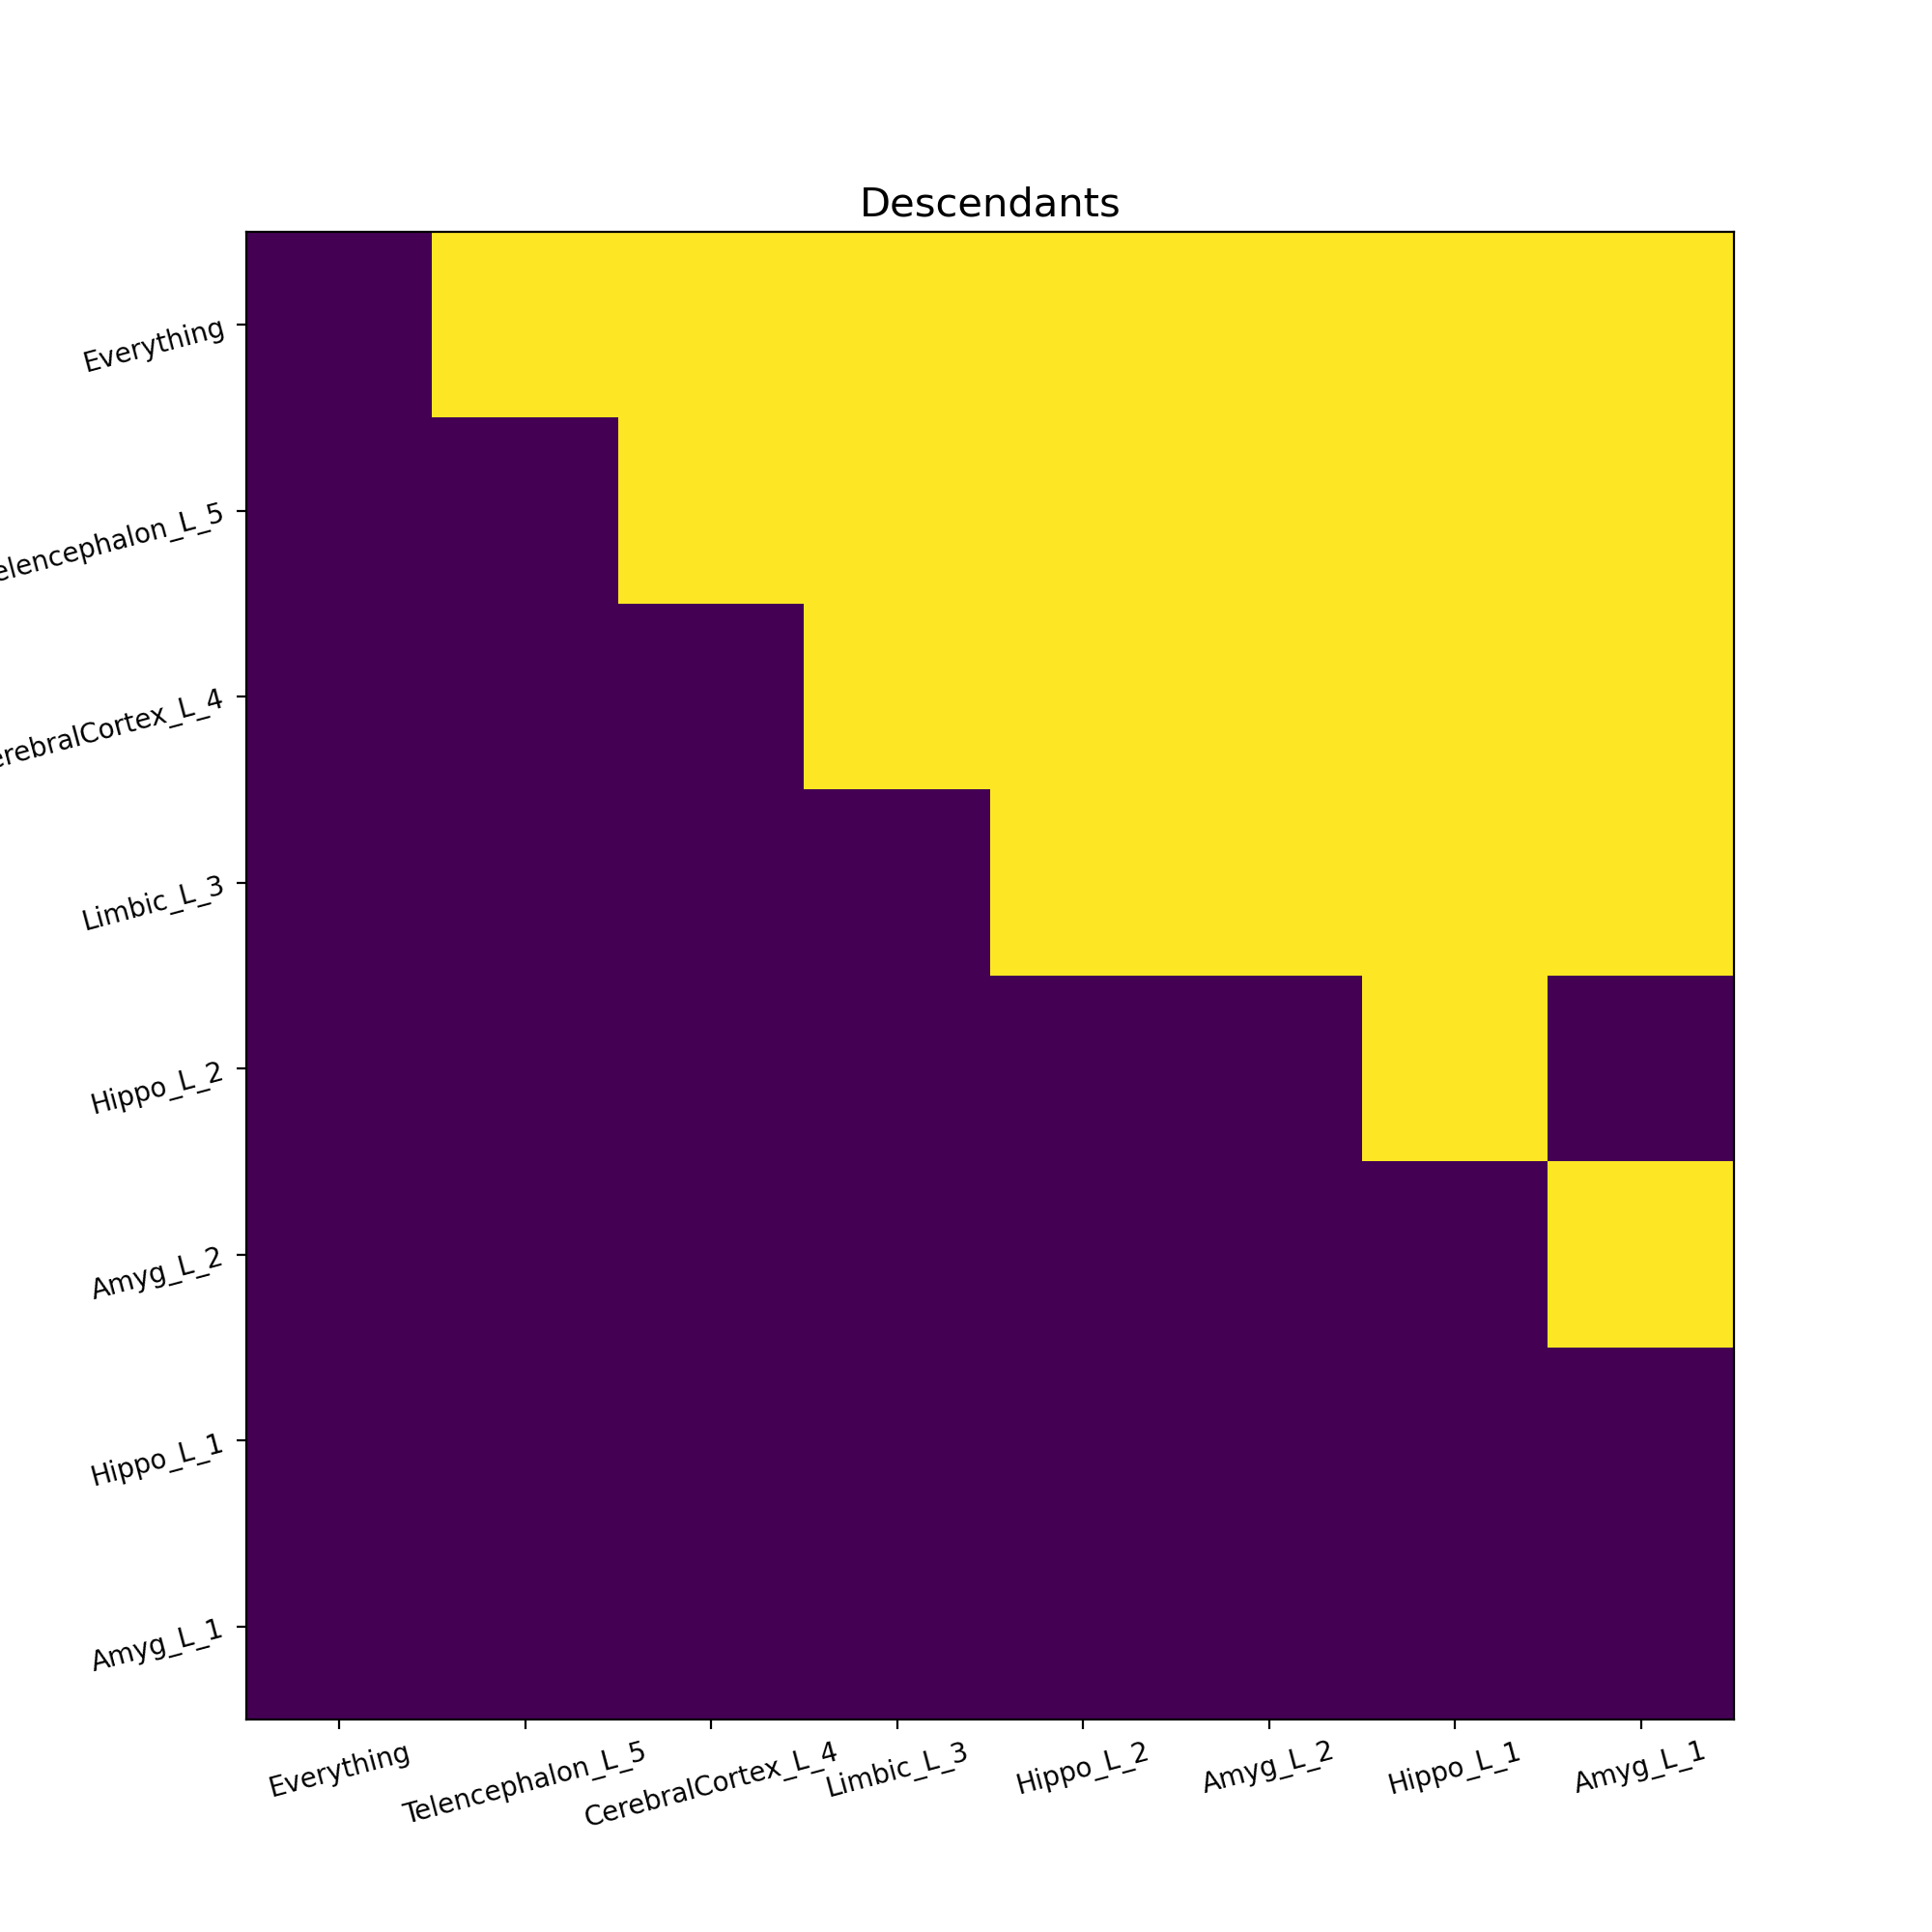

Text(0.5, 1.0, 'Descendants')

In [47]:
# Adjacency matrix that shows all descendants
S = np.array(subset, dtype = bool)
Descendants = np.copy(S)

# Adding additional generations to the descendants 
# Repeat 6 times since we have 5 generations (1, 2, 3, 4, 5)
Descendants = np.logical_or(Descendants,Descendants@S)
Descendants = np.logical_or(Descendants,Descendants@S)
Descendants = np.logical_or(Descendants,Descendants@S)
Descendants = np.logical_or(Descendants,Descendants@S)
Descendants = np.logical_or(Descendants,Descendants@S)
Descendants = np.logical_or(Descendants,Descendants@S)
Descendants_and_self = np.logical_or(Descendants, np.eye(M))

# Plot the adjacency matrix for all descendants
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(Descendants)
ax.set_xticks(np.arange(M))
ax.set_yticks(np.arange(M))
ax.set_xticklabels(names, rotation = 15, fontsize = 10)
ax.set_yticklabels(names, rotation = 15, fontsize = 10)
ax.set_title('Descendants', fontsize = 15)

<IPython.core.display.Javascript object>


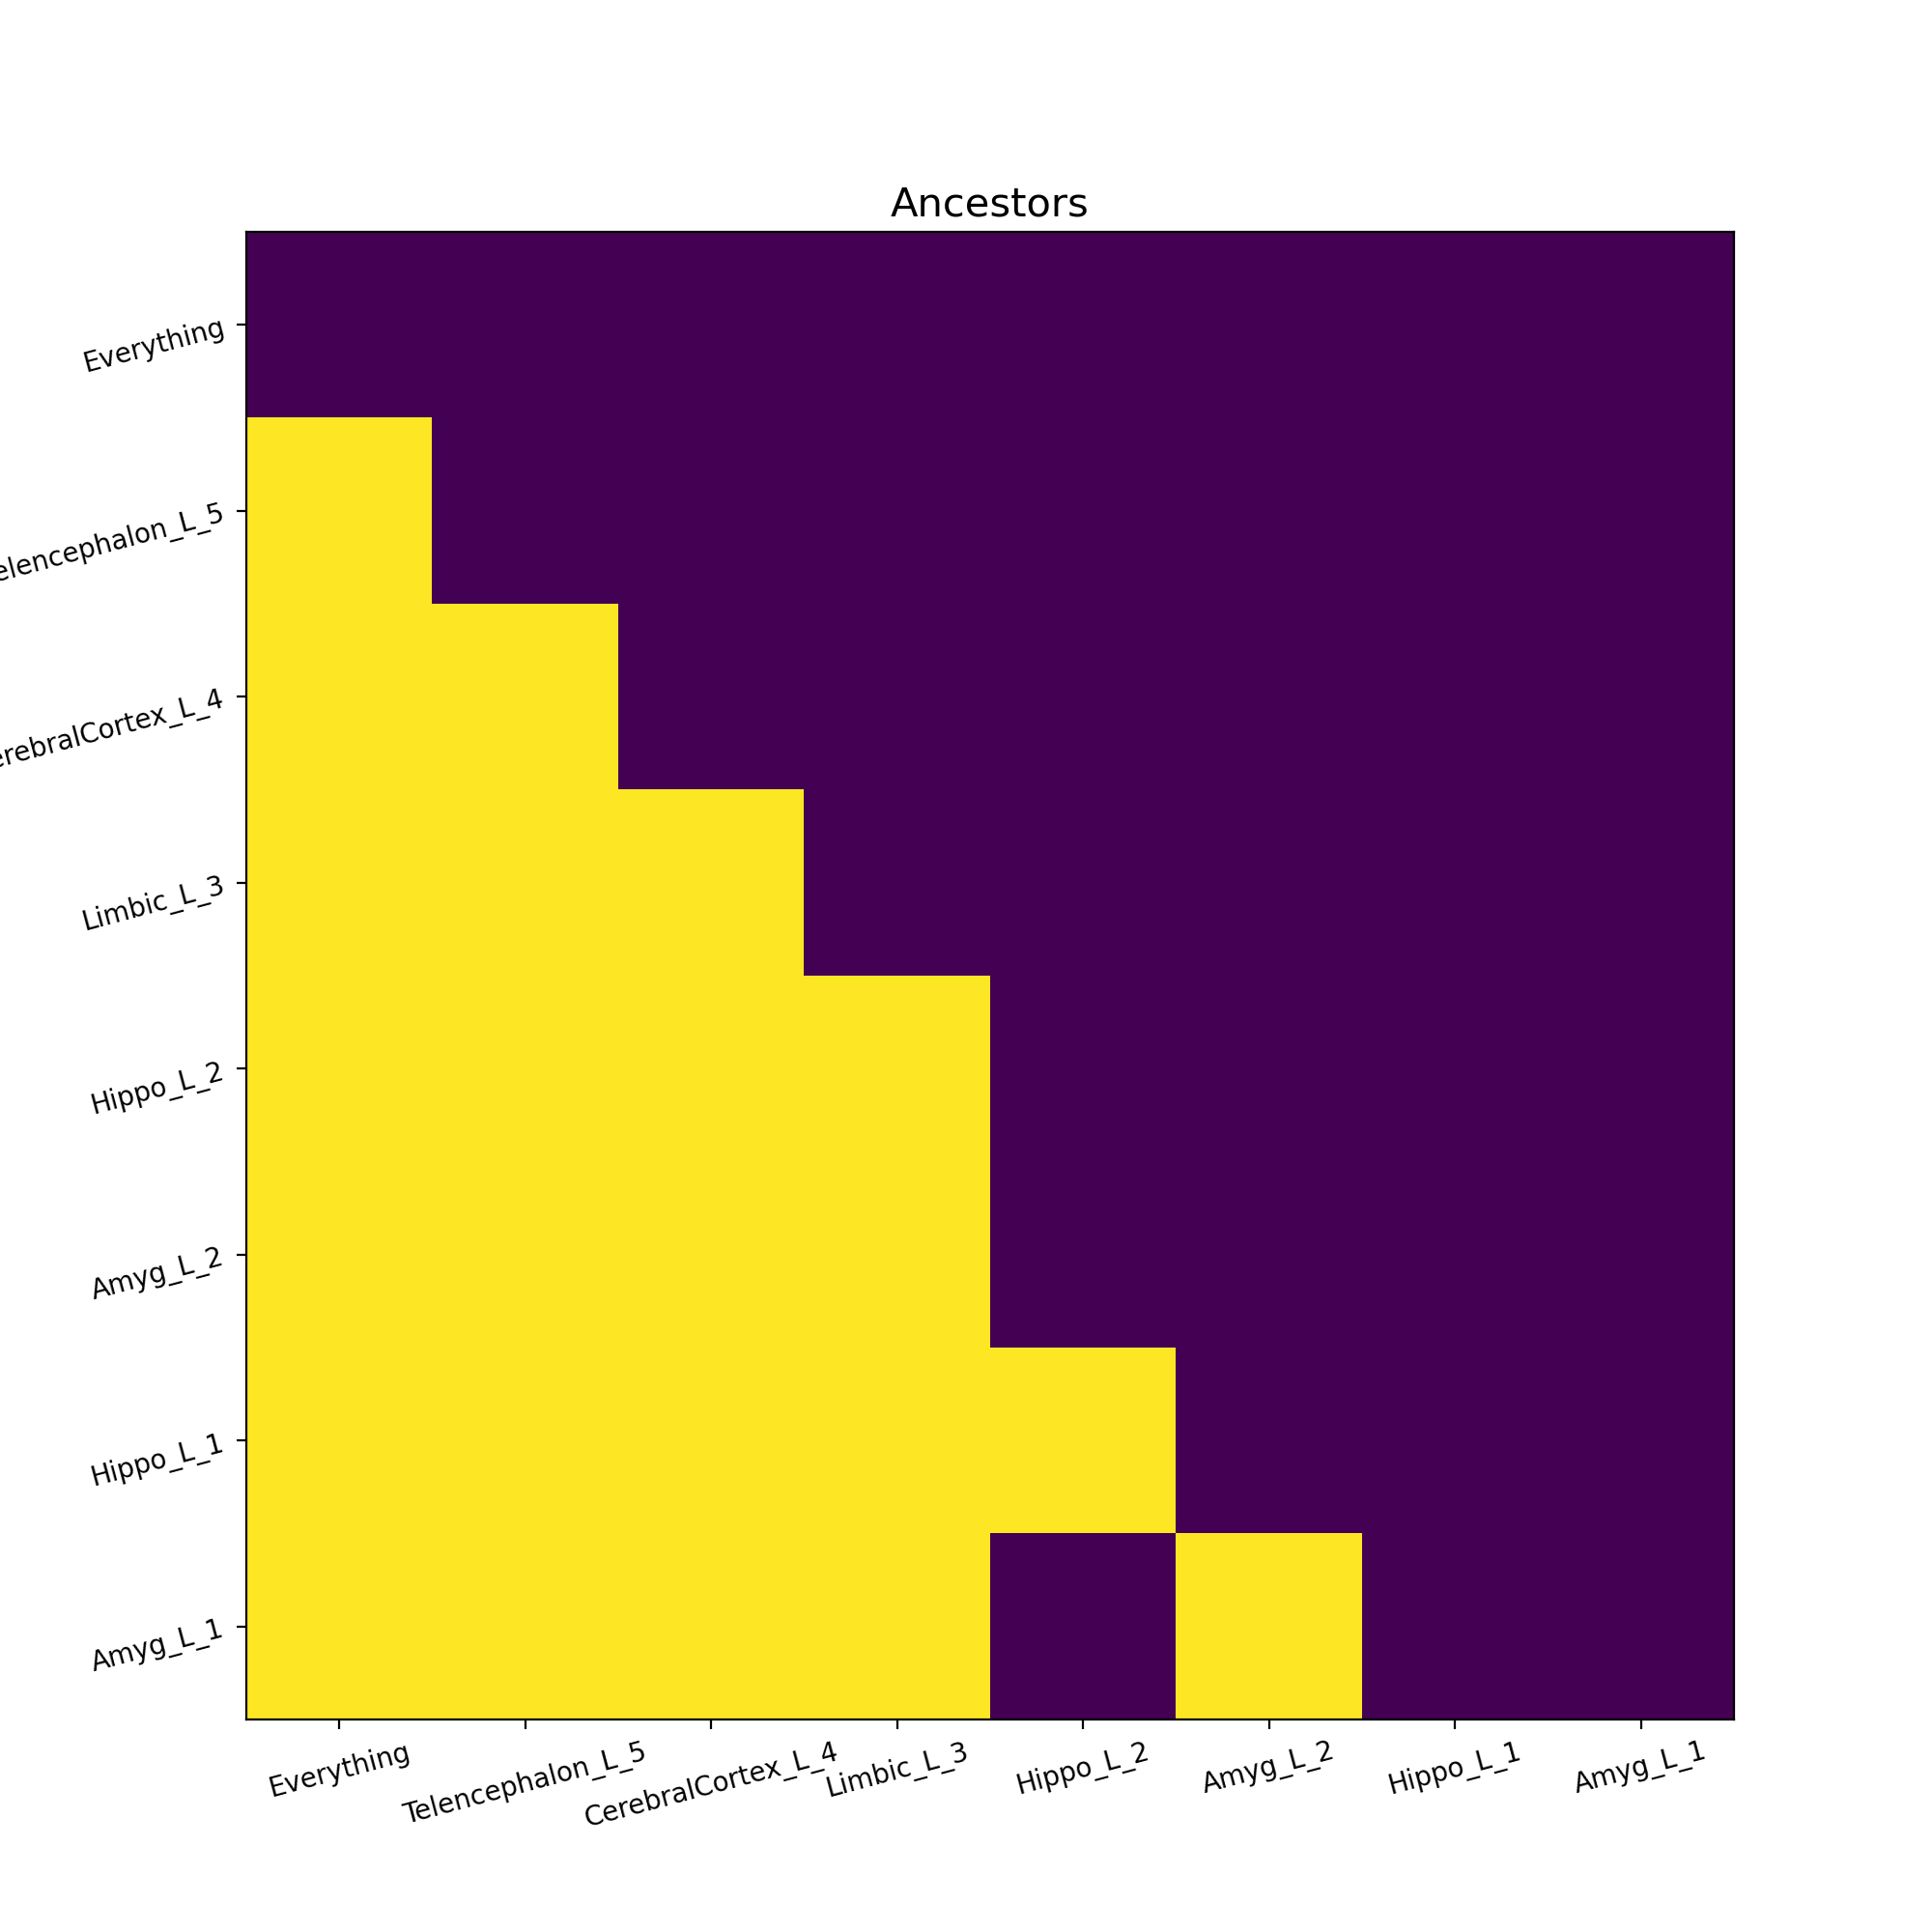

Text(0.5, 1.0, 'Ancestors')

In [48]:
# Adjacency matrix that shows all ancestors
Ancestors = Descendants.T # Take transpose of descendants matrix to get ancestors    
Ancestors_and_self = np.logical_or(Ancestors,np.eye(M))
fig,ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(Ancestors)
ax.set_xticks(np.arange(M))
ax.set_yticks(np.arange(M))
ax.set_xticklabels(names, rotation = 15, fontsize = 10)
ax.set_yticklabels(names, rotation = 15, fontsize = 10)
ax.set_title('Ancestors', fontsize = 15)

## Four cases to investigate using the adjacency matrix subset

We want to create four cases to investigate:

1. Nothing is affected
2. Only the left hippocampus is affected
3. Both the left hippocampus and left amygdala are affected
4. Either the left hippocampus or left amygdala are affected but not both (the above code for the original adjacency matrix investigated this case)

## Case 1: nothing is affected (negative control)

### Case 1: Generate data for adjacency matrix subset

We expect mostly dark colors for each structure in each sample (nothing is affected)

We expect the probability of being affected for each structure in each sample to be close to 0 (dark colors)

<IPython.core.display.Javascript object>


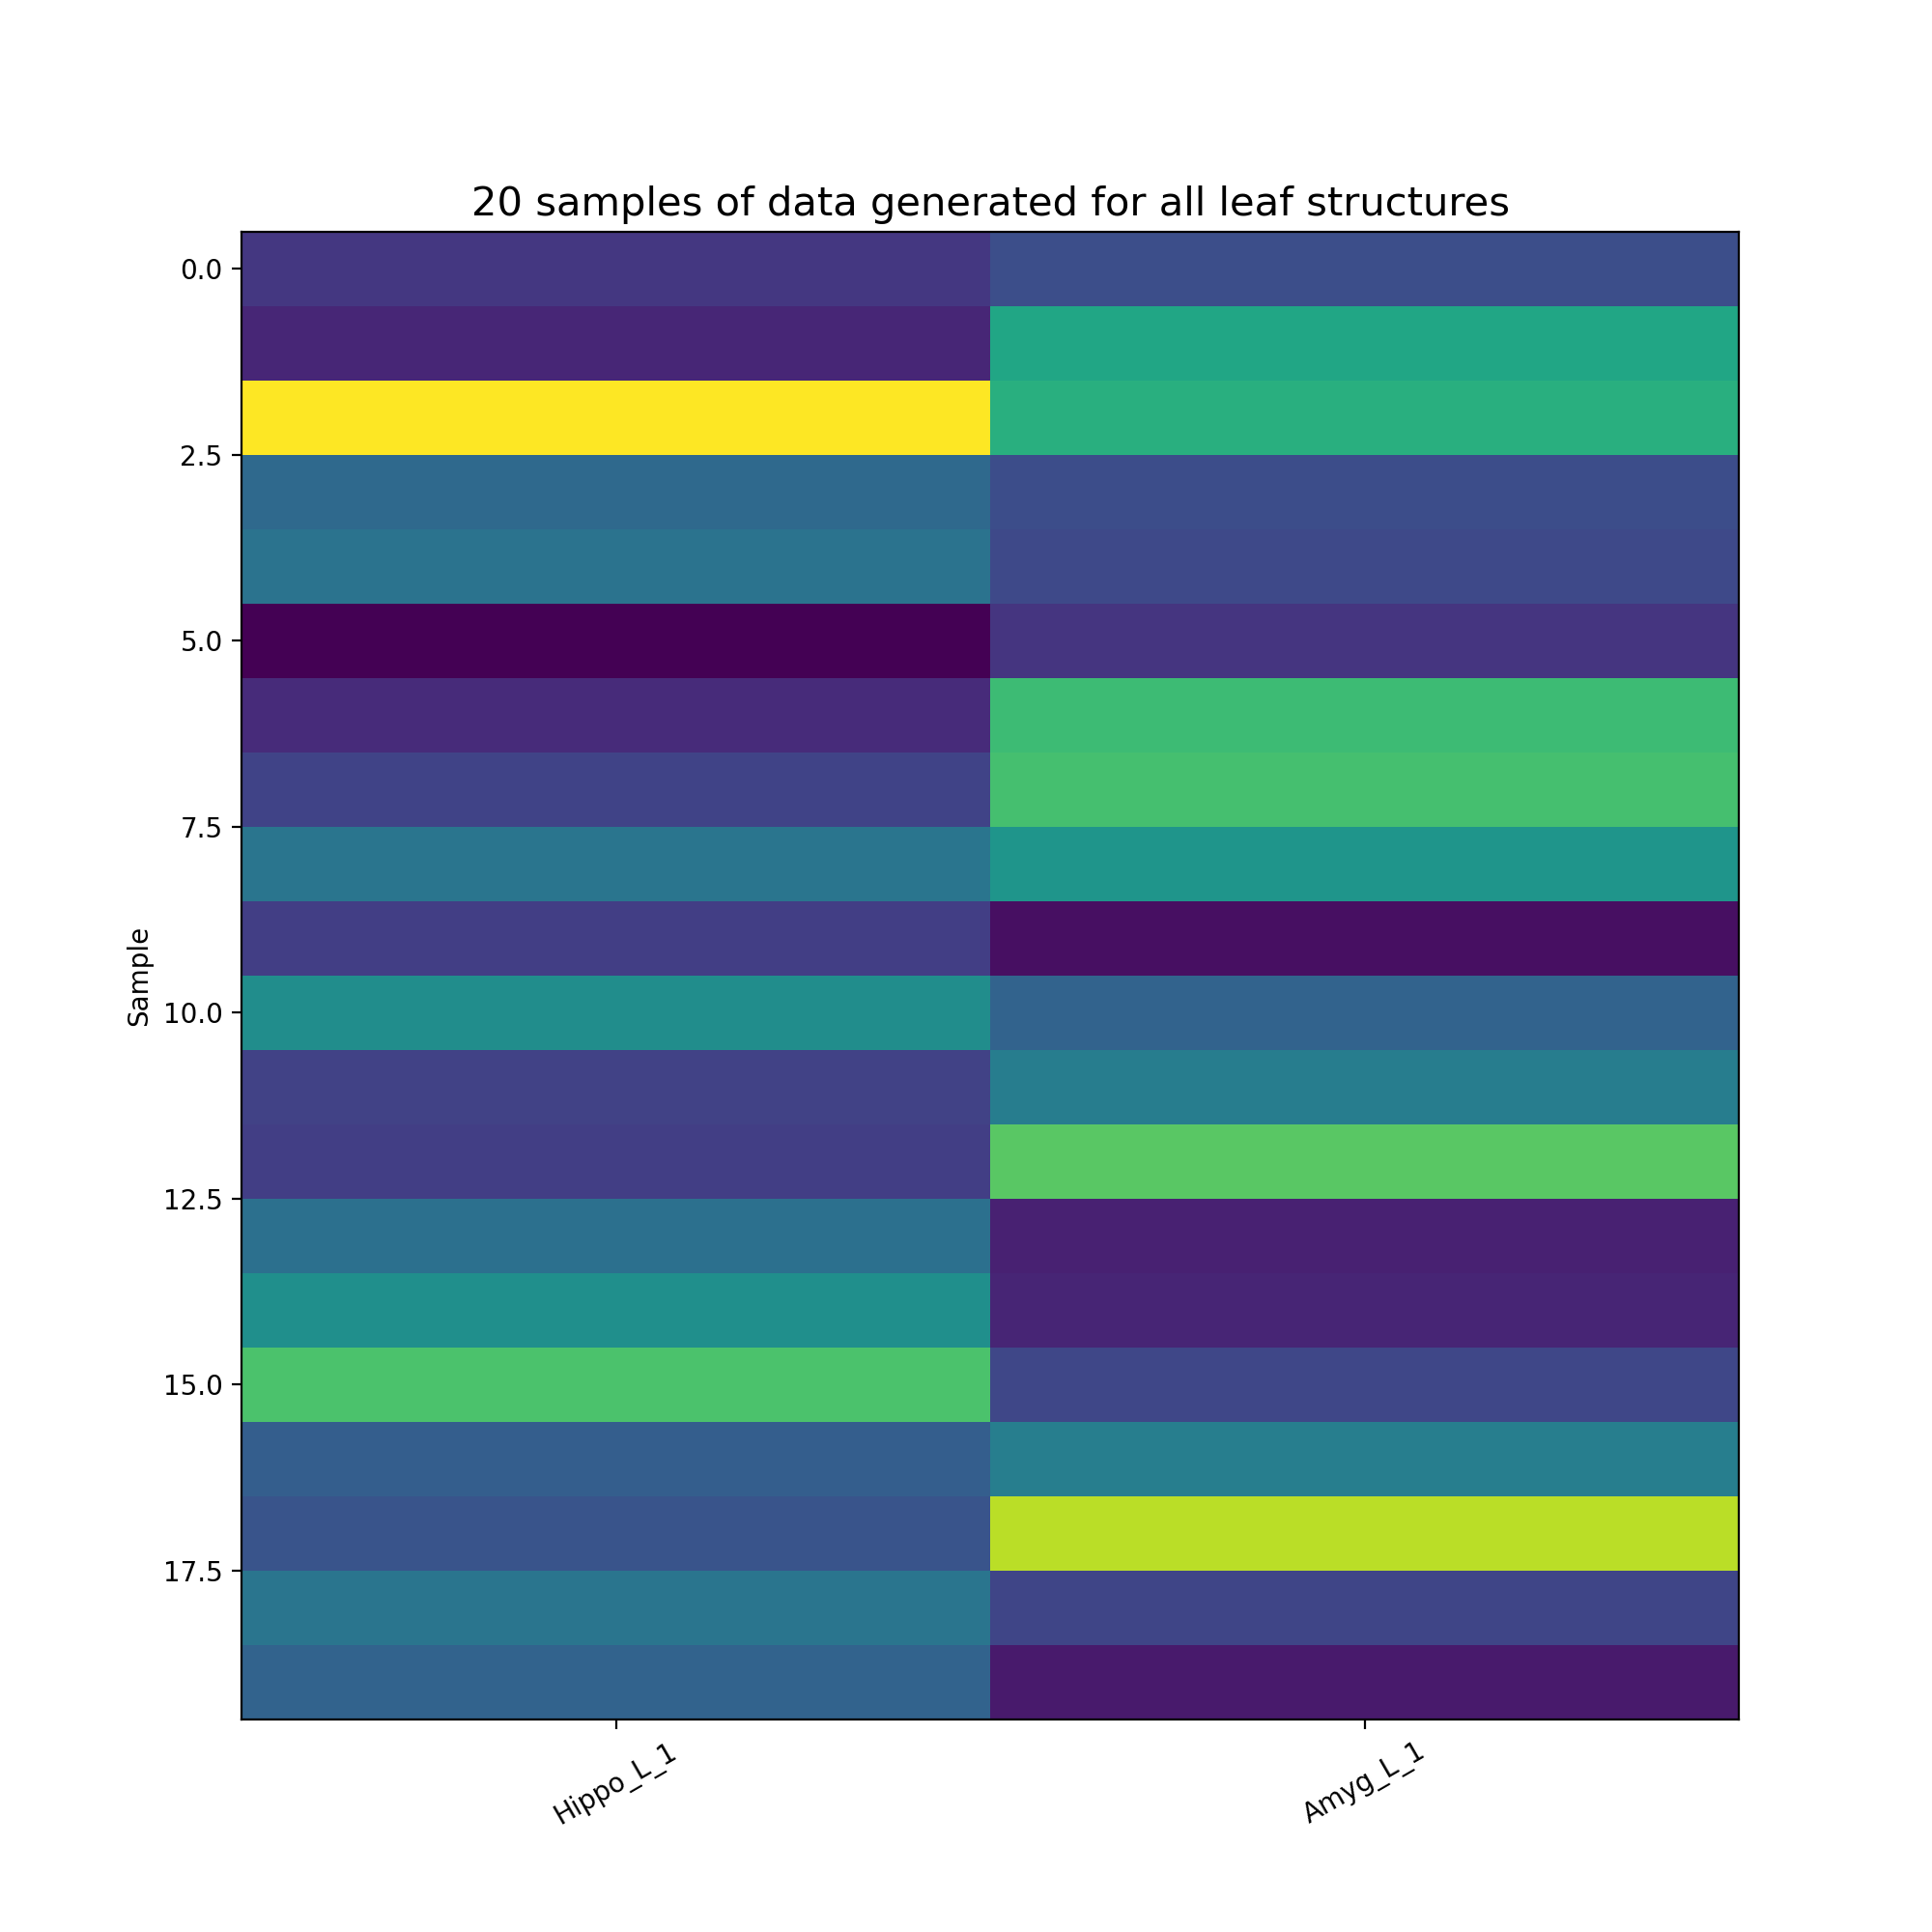

Text(0.5, 1.0, '20 samples of data generated for all leaf structures')

In [44]:
N = 20 # Number of samples
mu = 3.0 # Difference in mean, note that this is generally unknown. 
# It's easier to use mu = 3 for seeing differences
M = subset.shape[0] # Number of total unique structures
number_of_leaves = np.count_nonzero(np.sum(subset, 1) == 0) # Number of leaf structures (zero children)

Z = np.zeros((N,M)) # Initialize Z, which will be a binary variable that tells us if a structure is affected
# Z contains all zeros in this case since nothing is affected
# Z is a 20 x 8 matrix of zeros
Naffected = 0 # In this case, there will be zero samples affected
            
is_leaf = np.concatenate([np.ones(number_of_leaves), np.zeros(M - number_of_leaves)]) # 1 for leaf structures, 0 for non-leaf structures
is_leaf = np.array(is_leaf, dtype = bool) # Convert is_leaf to the boolean type
is_leaf = is_leaf[::-1] # Data specific
m = np.sum(is_leaf) # Number of leaf structures (m = 2)
            
G = np.arange(N) < Naffected # All falses since all samples are unaffected
X = Z[:, is_leaf > 0] * mu + np.random.randn(N, m)
# Z[:, is_leaf > 0] contains 20 pairs of 0,0s 
# Neither the left hippocampus nor left amygdala is affected in each of the 20 samples

# Visualize the data that was generated
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(X)
ax.set_aspect("auto")
ax.set_ylabel("Sample")
ax.set_xticks(np.arange(m))
ax.set_xticklabels(list(names[is_leaf > 0]), rotation = 30, fontsize = 10)
ax.set_title("20 samples of data generated for all leaf structures", fontsize = 15)

### Case 1: Using P and Q to estimate the probability that each structure is affected

<IPython.core.display.Javascript object>


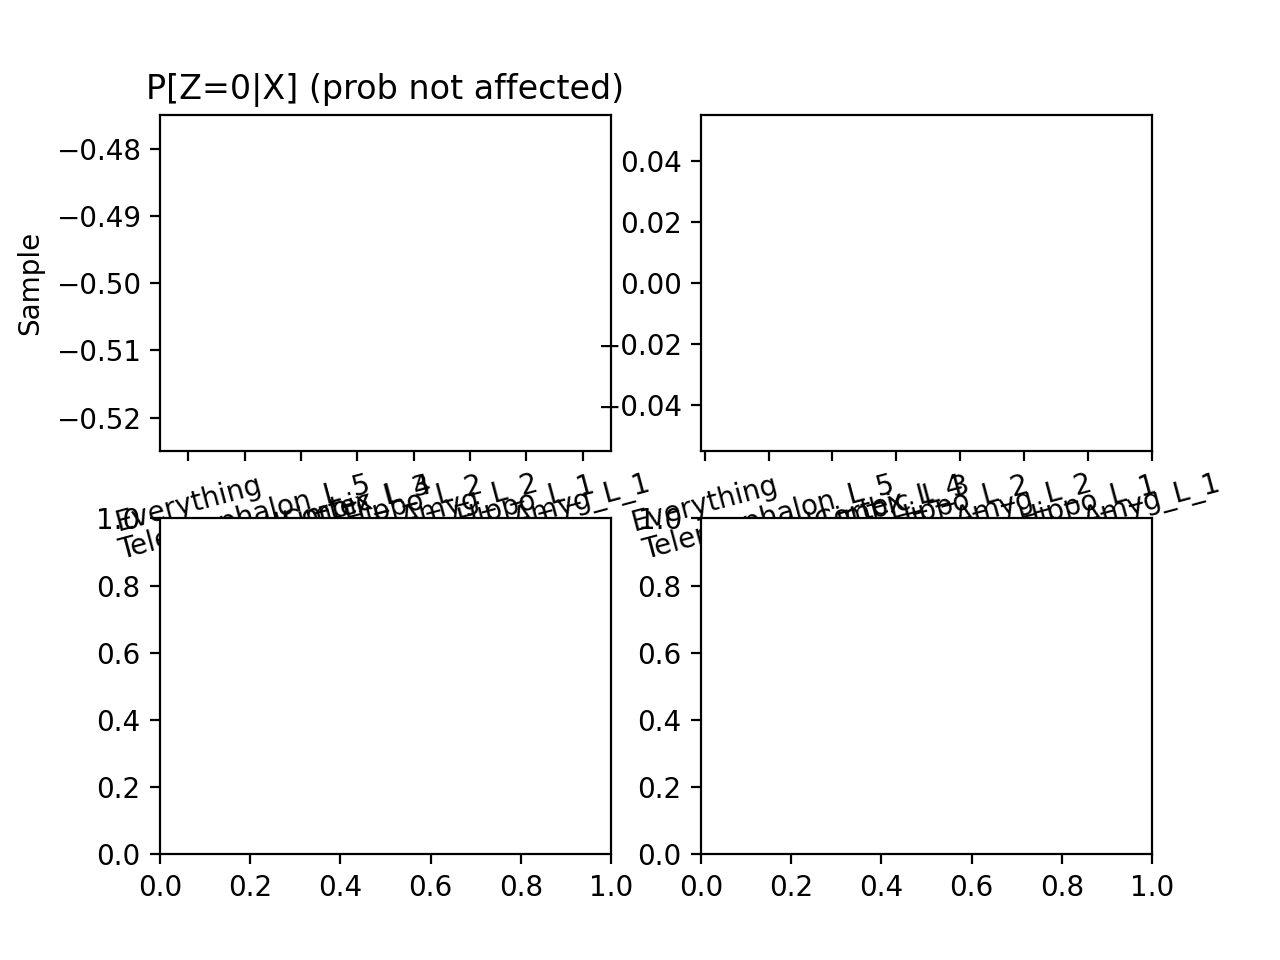

<ipython-input-13-711bd938f80e>:63: RuntimeWarning: invalid value encountered in true_divide
  P = -np.sum(np.expm1(log_posterior),0)/N
<ipython-input-13-711bd938f80e>:70: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  ax[0,0].imshow(posterior)


In [62]:
P = np.ones(M) * 0.5 # Array of 8 copies of 0.5
Q = Q_from_P(P, S)

P0 = np.ones(M) * 0.5
niter = 20
P = estimate_P(X[G], mu, S, Descendants_and_self, draw=1, P0=P0, niter=niter, names=names)

P is an array of eight NaNs since we can't divide by 0

I wasn't able to get actual results since there's an issue with the code related to dividing by 0

This somewhat makes sense since everything is 0 in this case

## Case 2: Only the left hippocampus is affected

### Case 2: Generate data for adjacency matrix subset

In this case, the first 10 samples are affected. In these 10 samples, specifically only the left hippocampus is affected.

We expect light colors (affected) for the left hippocampus in the first 10 samples 

We expect dark colors (unaffected) for the left hippocampus in the last 10 samples and for the left amygdala in all samples 

In [66]:
names[6], names[7]

('Hippo_L_1', 'Amyg_L_1')

<IPython.core.display.Javascript object>


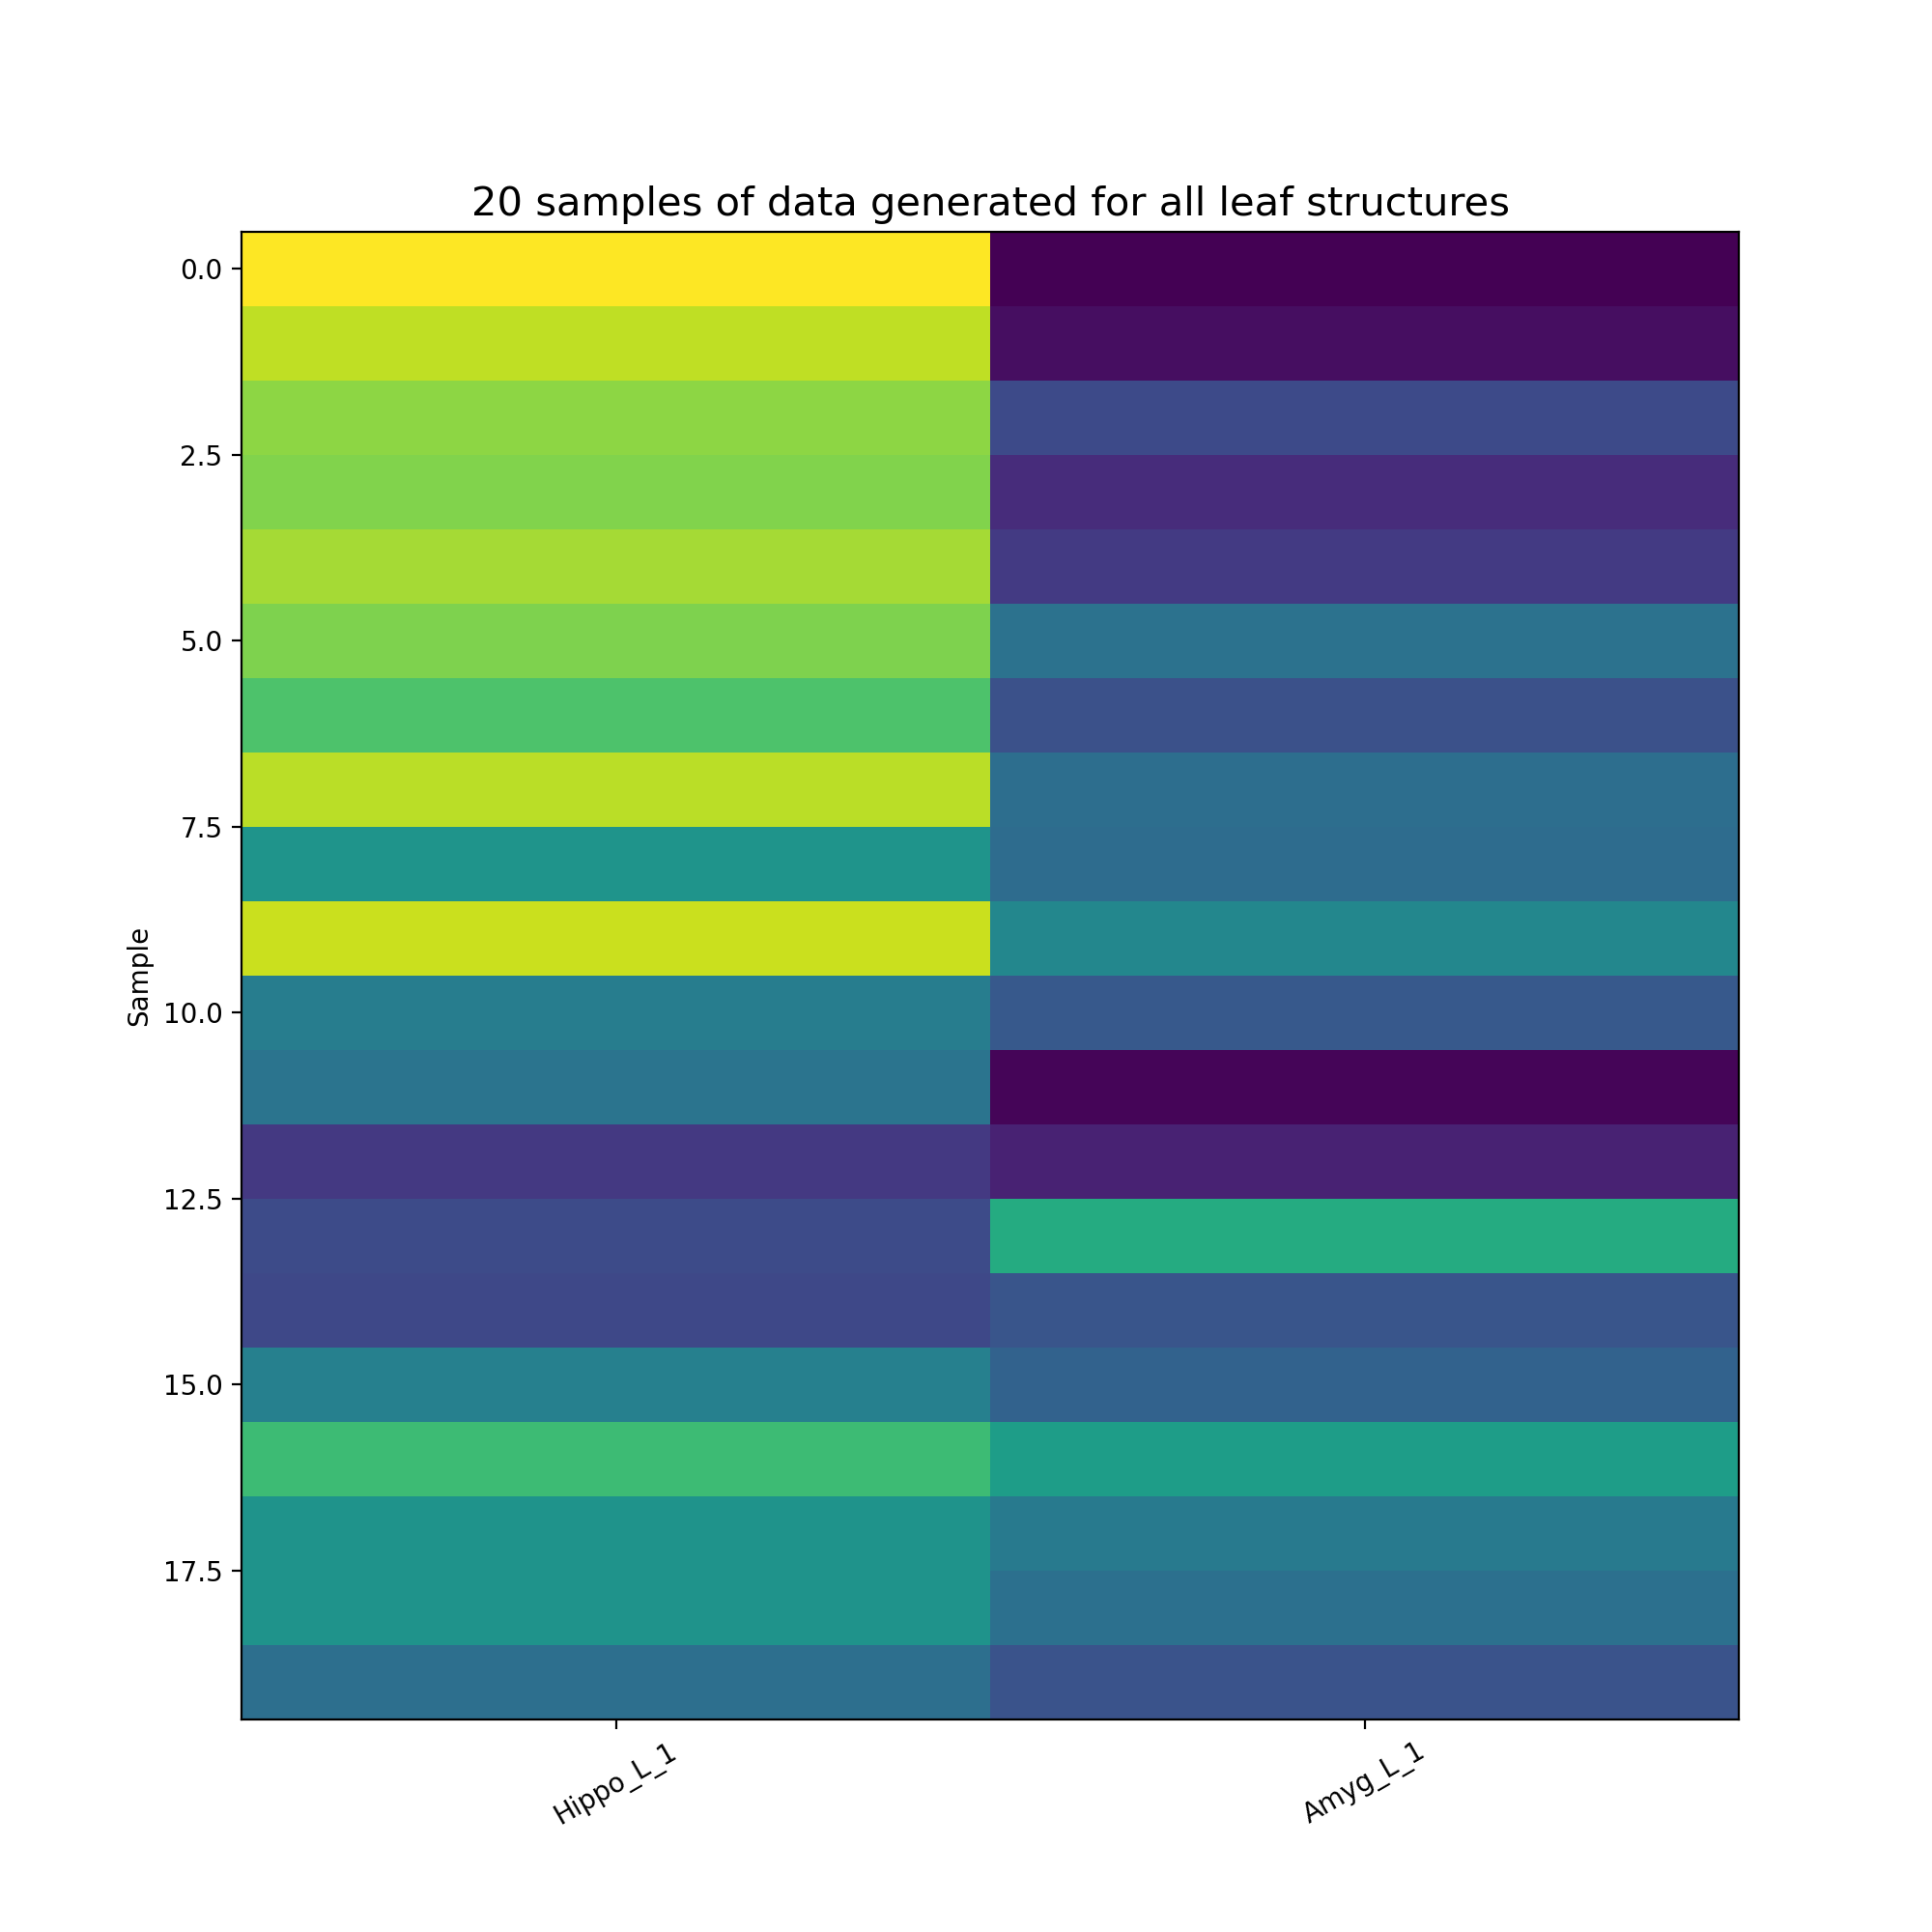

Text(0.5, 1.0, '20 samples of data generated for all leaf structures')

In [67]:
N = 20 # Number of samples
mu = 3.0 # Difference in mean, note that this is generally unknown. 
# It's easier to use mu = 3 for seeing differences
M = subset.shape[0] # Number of total unique structures
number_of_leaves = np.count_nonzero(np.sum(subset, 1) == 0) # Number of leaf structures (zero children)

Z = np.zeros((N,M)) # Initialize Z, which will be a binary variable that tells us if a structure is affected
Naffected = N // 2 # Affected samples (roughly half), note that this is generally unknown
for i in range(N):
    if i < Naffected: # Assume that the first half of samples are affected and second half are not
        Z[i][6] = 1 # Left hippocampus is affected
            
is_leaf = np.concatenate([np.ones(number_of_leaves), np.zeros(M - number_of_leaves)]) # 1 for leaf structures, 0 for non-leaf structures
is_leaf = np.array(is_leaf, dtype = bool) # Convert is_leaf to the boolean type
is_leaf = is_leaf[::-1] # Data specific
m = np.sum(is_leaf) # Number of leaf structures (m = 2)
            
G = np.arange(N) < Naffected
X = Z[:, is_leaf > 0] * mu + np.random.randn(N, m)

# Visualize the data that was generated
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(X)
ax.set_aspect("auto")
ax.set_ylabel("Sample")
ax.set_xticks(np.arange(m))
ax.set_xticklabels(list(names[is_leaf > 0]), rotation = 30, fontsize = 10)
ax.set_title("20 samples of data generated for all leaf structures", fontsize = 15)

### Case 2: Using P and Q to estimate the probability that each structure is affected

<IPython.core.display.Javascript object>


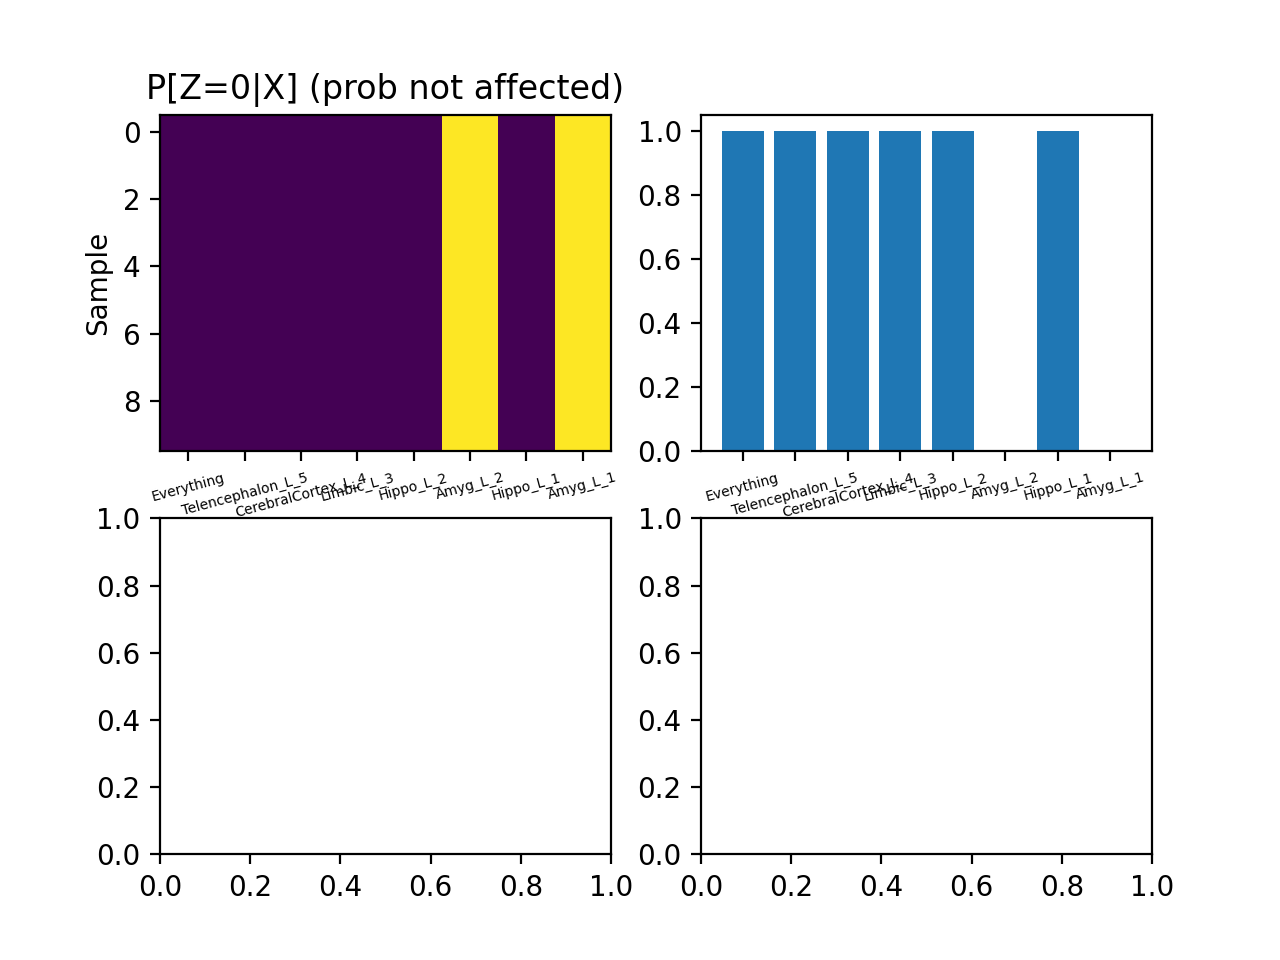

In [70]:
P = np.ones(M) * 0.5 # Array of 8 copies of 0.5
Q = Q_from_P(P, S)

P0 = np.ones(M) * 0.5
niter = 20
P = estimate_P(X[G], mu, S, Descendants_and_self, draw=1, P0=P0, niter=niter, names=names)

Left plot: The left amygdala at levels 1 and 2 have a 1.0 probability of not being affected. All other structures (left hippocampus and all of its parents) have a 0 probability of not being affected.

Right plot: The left hippocampus and all of its parents have a 1.0 probability of being affected. The left amygdala at levels 1 and 2 have a 0 probability of being affected.

These are the results we expect for case 2.

## Case 3: Both the left hippocampus and left amygdala are affected 

### Case 3: Generate data for adjacency matrix subset

In this case, the first 10 samples are affected. In these 10 samples, both the left hippocampus and left  amygdala are affected.

We expect light colors (affected) for both the left hippocampus and left amygdala in the first 10 samples

We expect dark colors (unaffected) for both the left hippocampus and left amygdala in the last 10 samples 

<IPython.core.display.Javascript object>


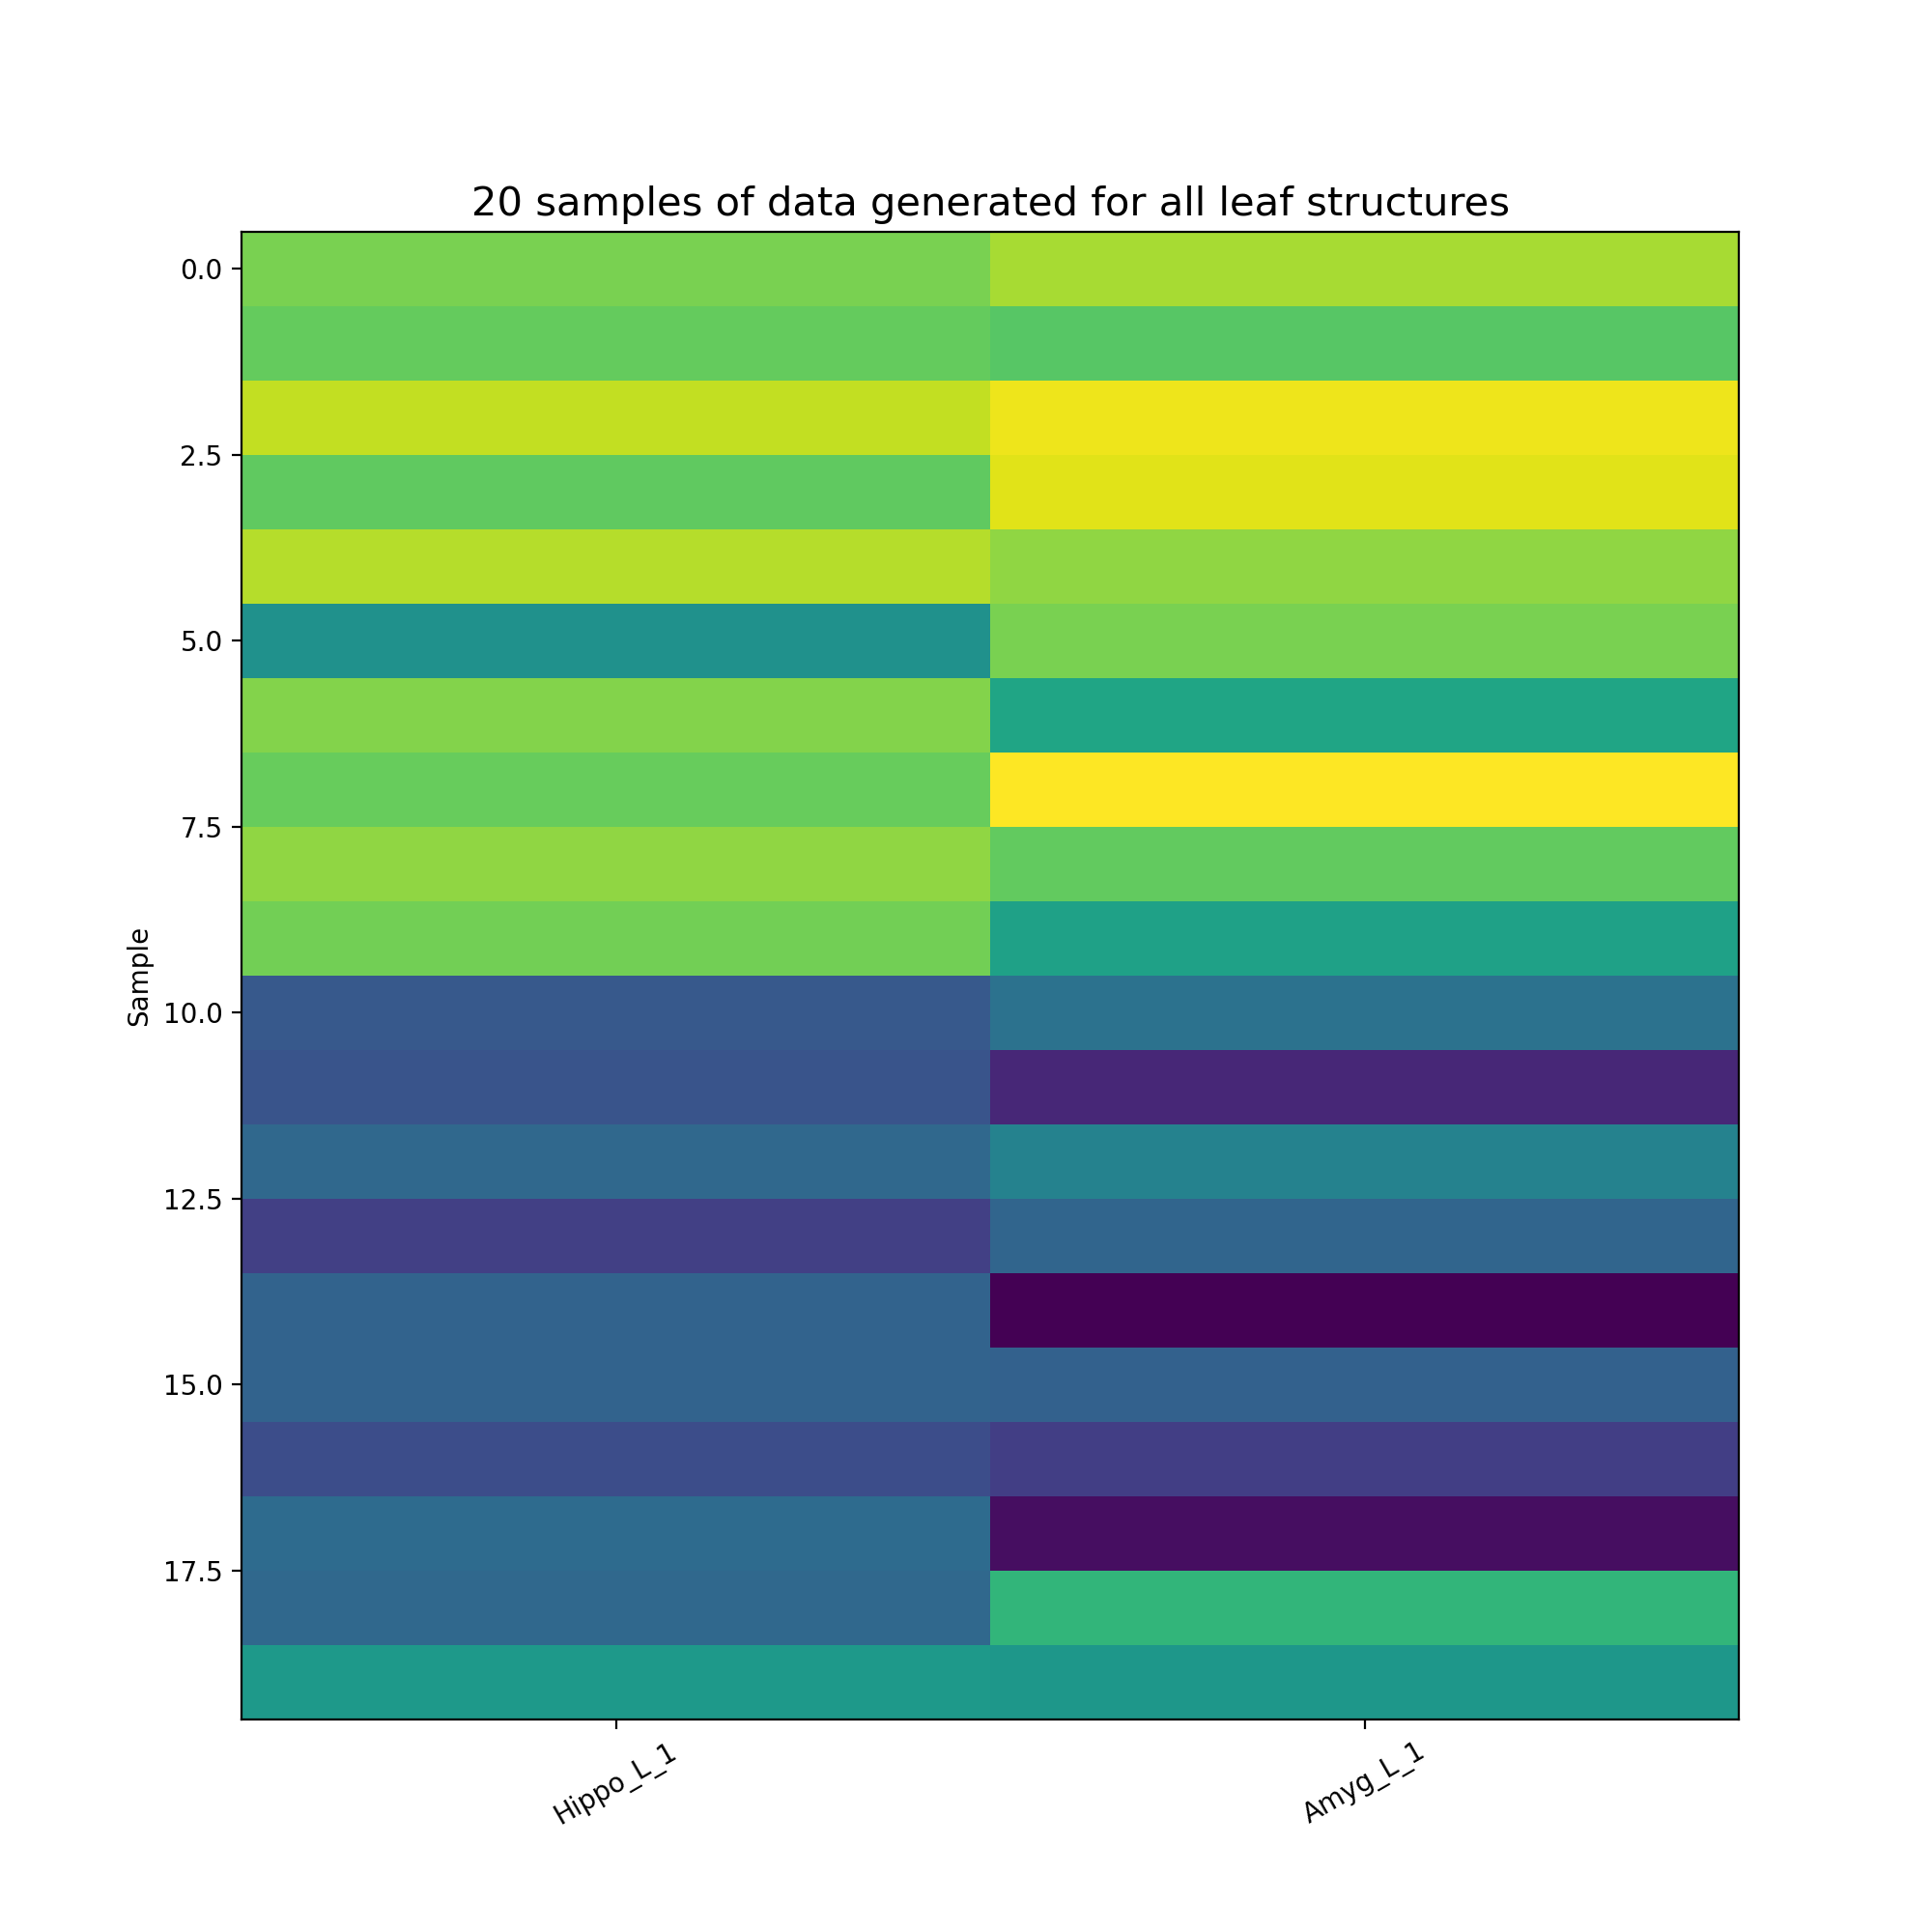

Text(0.5, 1.0, '20 samples of data generated for all leaf structures')

In [71]:
N = 20 # Number of samples
mu = 3.0 # Difference in mean, note that this is generally unknown. 
# It's easier to use mu = 3 for seeing differences
M = subset.shape[0] # Number of total unique structures
number_of_leaves = np.count_nonzero(np.sum(subset, 1) == 0) # Number of leaf structures (zero children)

Z = np.zeros((N,M)) # Initialize Z, which will be a binary variable that tells us if a structure is affected
Naffected = N // 2 # Affected samples (roughly half), note that this is generally unknown
for i in range(N):
    if i < Naffected: # Assume that the first half of samples are affected and second half are not
        Z[i][6] = 1 # Left hippocampus is affected
        Z[i][7] = 1 # Left amygdala is affected
            
is_leaf = np.concatenate([np.ones(number_of_leaves), np.zeros(M - number_of_leaves)]) # 1 for leaf structures, 0 for non-leaf structures
is_leaf = np.array(is_leaf, dtype = bool) # Convert is_leaf to the boolean type
is_leaf = is_leaf[::-1] # Data specific
m = np.sum(is_leaf) # Number of leaf structures (m = 2)
            
G = np.arange(N) < Naffected
X = Z[:, is_leaf > 0] * mu + np.random.randn(N, m)

# Visualize the data that was generated
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(X)
ax.set_aspect("auto")
ax.set_ylabel("Sample")
ax.set_xticks(np.arange(m))
ax.set_xticklabels(list(names[is_leaf > 0]), rotation = 30, fontsize = 10)
ax.set_title("20 samples of data generated for all leaf structures", fontsize = 15)

### Case 3: Using P and Q to estimate the probability that each structure is affected

<IPython.core.display.Javascript object>


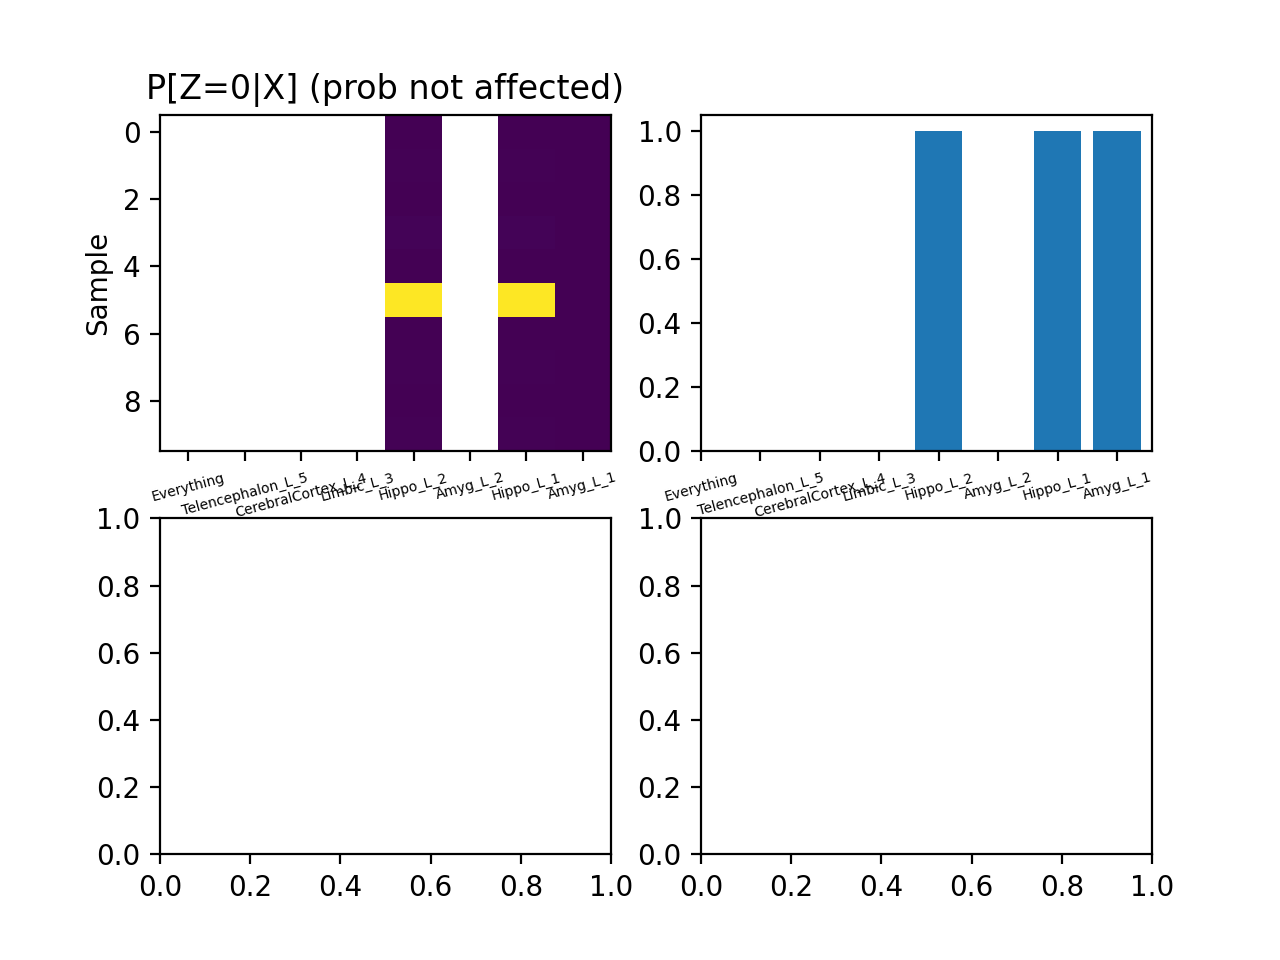

<ipython-input-69-382019212486>:24: RuntimeWarning: divide by zero encountered in true_divide
  P_over_one_minus_P = P/(1.0-P)
<ipython-input-69-382019212486>:46: RuntimeWarning: invalid value encountered in double_scalars
  log_adjustment_single[i] = -np.log1p(P_over_one_minus_P[i]*np.prod(1.0 - Q[A[i,:]]))


In [72]:
P = np.ones(M) * 0.5 # Array of 8 copies of 0.5
Q = Q_from_P(P, S)

P0 = np.ones(M) * 0.5
niter = 20
P = estimate_P(X[G], mu, S, Descendants_and_self, draw=1, P0=P0, niter=niter, names=names)

Not all of the code was able to run successfully (see the error above)

## Case 4: Either the left hippocampus or left amygdala are affected but not both

### Case 4: Generate data for adjacency matrix subset

In this case, the first 10 samples are affected. In these 10 samples, whether the left hippocampus or the left  amygdala is affected is determined at random.

We expect some light colors (affected) for either the left hippocampus or the left amygdala in the first 10 samples

We expect all dark colors (unaffected) for both the left hippocampus and left amygdala in the last 10 samples 

<IPython.core.display.Javascript object>


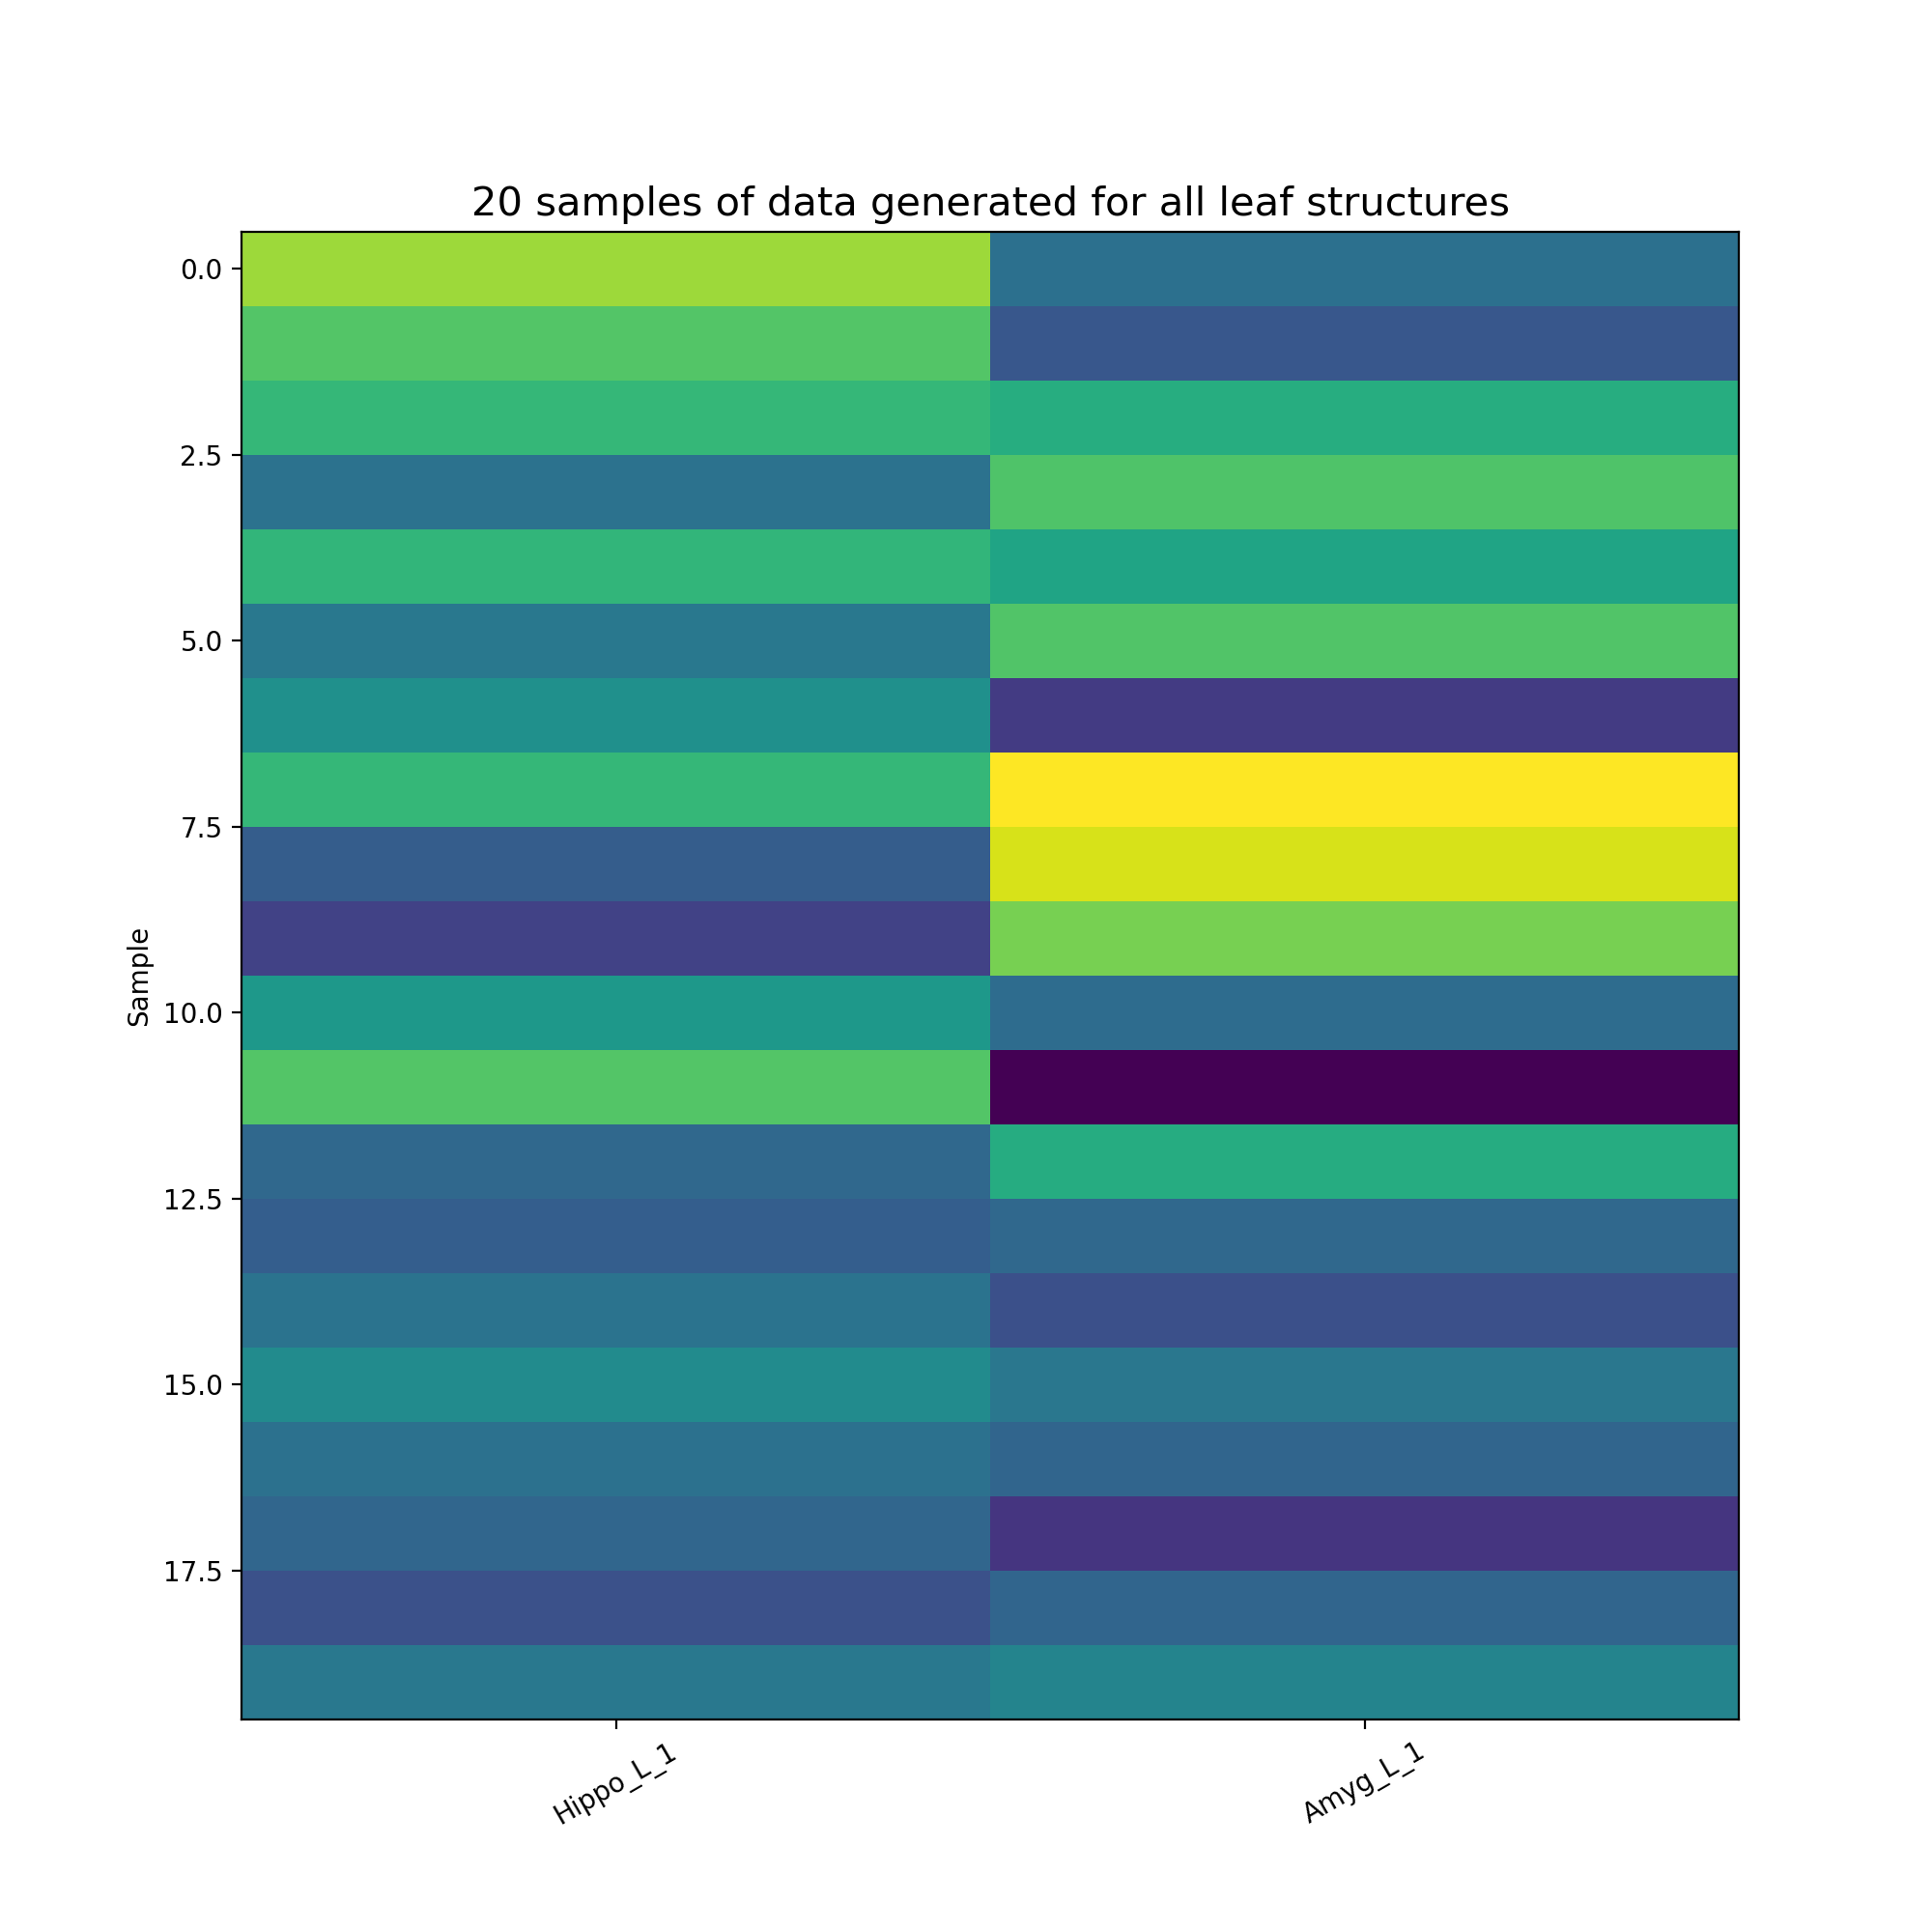

Text(0.5, 1.0, '20 samples of data generated for all leaf structures')

In [74]:
N = 20 # Number of samples
mu = 3.0 # Difference in mean, note that this is generally unknown. 
# It's easier to use mu = 3 for seeing differences
M = subset.shape[0] # Number of total unique structures
number_of_leaves = np.count_nonzero(np.sum(subset, 1) == 0) # Number of leaf structures (zero children)

Z = np.zeros((N,M)) # Initialize Z, which will be a binary variable that tells us if a structure is affected
Naffected = N // 2 # Affected samples (roughly half), note that this is generally unknown
for i in range(N):
    if i < Naffected: # Assume that the first half of samples are affected and second half are not
        if np.random.rand() < 0.5:
            Z[i][6] = 1 # Left hippocampus is affected
        else:
            Z[i][7] = 1 # Left amygdala is affected
            
is_leaf = np.concatenate([np.ones(number_of_leaves), np.zeros(M - number_of_leaves)]) # 1 for leaf structures, 0 for non-leaf structures
is_leaf = np.array(is_leaf, dtype = bool) # Convert is_leaf to the boolean type
is_leaf = is_leaf[::-1] # Data specific
m = np.sum(is_leaf) # Number of leaf structures (m = 2)
            
G = np.arange(N) < Naffected
X = Z[:, is_leaf > 0] * mu + np.random.randn(N, m)

# Visualize the data that was generated
fig, ax = plt.subplots(1, figsize = (10, 10))
ax.imshow(X)
ax.set_aspect("auto")
ax.set_ylabel("Sample")
ax.set_xticks(np.arange(m))
ax.set_xticklabels(list(names[is_leaf > 0]), rotation = 30, fontsize = 10)
ax.set_title("20 samples of data generated for all leaf structures", fontsize = 15)

### Case 4: Using P and Q to estimate the probability that each structure is affected 

<IPython.core.display.Javascript object>


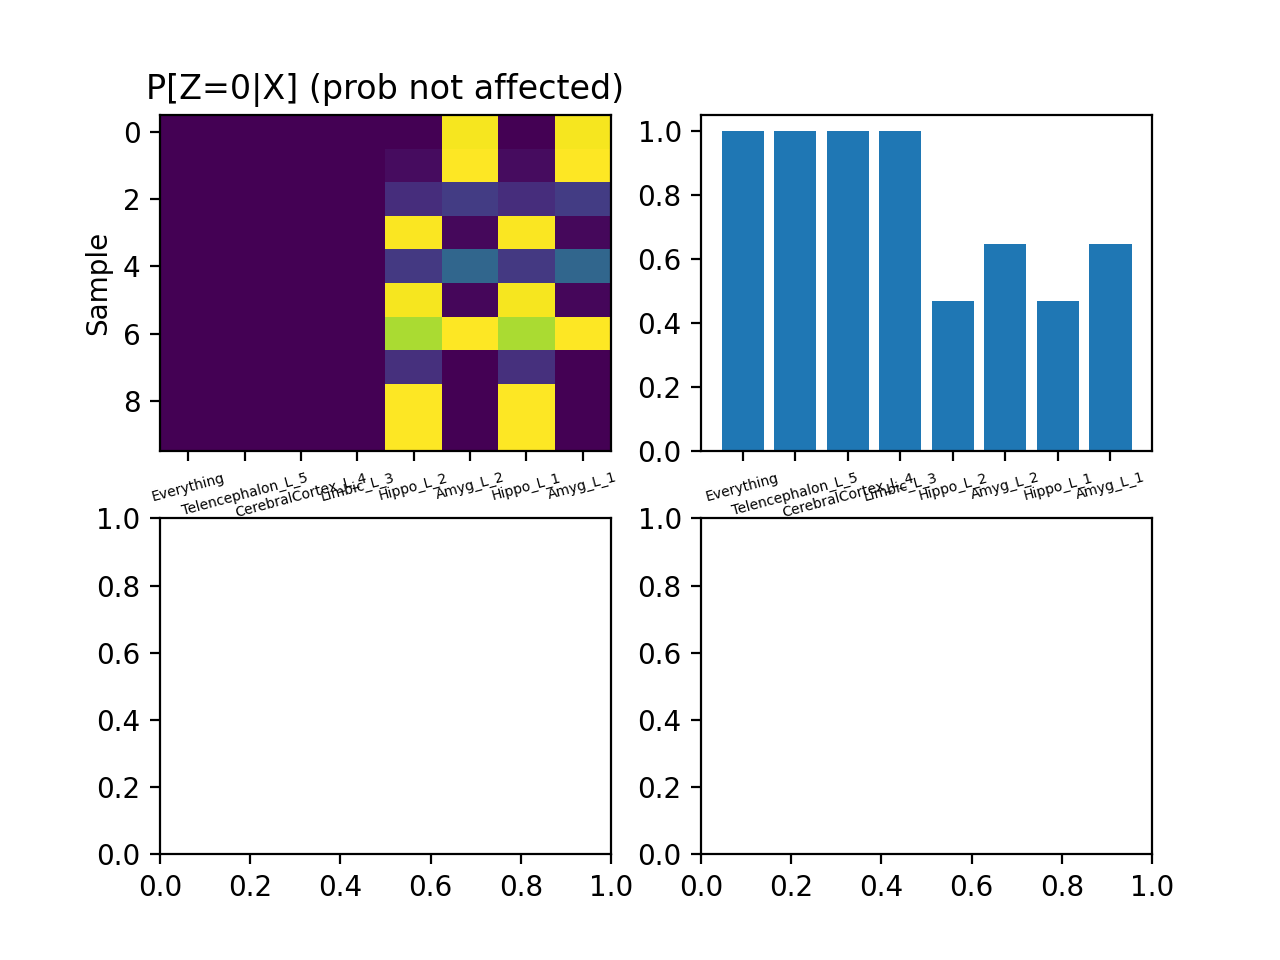

In [75]:
P = np.ones(M) * 0.5 # Array of 8 copies of 0.5
Q = Q_from_P(P, S)

P0 = np.ones(M) * 0.5
niter = 20
P = estimate_P(X[G], mu, S, Descendants_and_self, draw=1, P0=P0, niter=niter, names=names)

Left plot: The parent structures all have a 0 probability of not being affected. The children structures have a random mix of probabilities of not being affected.

Right plot: The parent structures all have a 1.0 probability of being affected. The childrenn structures all have a roughly 0.5 probability of being affected.

These are the results we expect for case 4.